# Plot Generation

## Test Below

In [1]:
import generate_random_scatter as grs

In [5]:
import os

# base_folder = '/Users/nils/CC/Semantic-Segmentation-Suite/graphs2'
base_folder = 'example_data/graphs1'
for dataset in ['train', 'val', 'test']:
    os.makedirs(os.path.join(base_folder, dataset), exist_ok=True)
    os.makedirs(os.path.join(base_folder, dataset+'_labels'), exist_ok=True)

for dataset in ['train', 'val', 'test']:
    for i in range(10):
        data_folder = os.path.join(base_folder, dataset)
        grs.generate_training_plot(data_folder, str(i).zfill(6))

/anaconda/envs/graphs/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda/envs/graphs/lib/python3.5/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
  MathTextWarning)


# The rest of this is development garbage

In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import numpy as np
import generate_random_scatter as grs
import importlib
importlib.reload(grs)
import pandas as pd

/Users/nils/CC/scatteract/generate_random_scatter.py:17: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('Agg') #To make sure plots are not being displayed during the generation.
/Users/nils/CC/scatteract/generate_random_scatter.py:17: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('Agg') #To make sure plots are not being displayed during the generation.


## Ok, the core issue with this library is the random sampling. It needs to be WAY better.

Instead of calling np.random.rand at every line, it seems like what we might want is a truncated normal distribution sampler. Basically every parameter has a lower and upper bound in this library. Let's load those from csv instead of hard coding!

## First of all, the choices need to be loaded up as a dataframe from an editable csv

## But first, the discrete choices

In [2]:
grs.dfd.head()

markers line_styles colors bg_colors tick_directions point_dist  \
0       o       solid      b         w              in    uniform   
1       v      dashed      g      0.98             out     linear   
2       ^     dashdot      r      0.96           inout  quadratic   
3       <      dotted      k      0.94             NaN        NaN   
4       >       solid   0.05      0.92             NaN        NaN   

  font_weights font_styles          font_names  
0      regular      normal     fonts/ARIAL.TTF  
1         bold      italic   fonts/ARIALBD.TTF  
2      regular      normal   fonts/ARIALBI.TTF  
3      regular      normal    fonts/ARIALI.TTF  
4      regular      normal  fonts/ARIALUNI.TTF

## now the continuous choices

In [3]:
grs.dfc.head()

min    max    mean  n_stds  \
param                                      
dpi          72.0  300.0  100.00     NaN   
fig_widths    3.0   10.0    5.00     2.0   
fig_aspects   0.5    2.0    1.25     NaN   
alpha         0.3    1.0    0.90     2.0   
line_widths   0.0    3.0    1.00     NaN   

                                                       sampler  
param                                                           
dpi          <scipy.stats._distn_infrastructure.rv_frozen o...  
fig_widths   <scipy.stats._distn_infrastructure.rv_frozen o...  
fig_aspects  <scipy.stats._distn_infrastructure.rv_frozen o...  
alpha        <scipy.stats._distn_infrastructure.rv_frozen o...  
line_widths  <scipy.stats._distn_infrastructure.rv_frozen o...

(array([ 85., 107., 101., 112., 109.,  95.,  72.,  81.,  51.,  43.,  46.,
         28.,  26.,  18.,  13.,   6.,   3.,   0.,   2.,   2.]),
 array([1.91442045e-03, 2.95752678e-01, 5.89590935e-01, 8.83429193e-01,
        1.17726745e+00, 1.47110571e+00, 1.76494396e+00, 2.05878222e+00,
        2.35262048e+00, 2.64645874e+00, 2.94029699e+00, 3.23413525e+00,
        3.52797351e+00, 3.82181177e+00, 4.11565002e+00, 4.40948828e+00,
        4.70332654e+00, 4.99716480e+00, 5.29100305e+00, 5.58484131e+00,
        5.87867957e+00]),
 <a list of 20 Patch objects>)

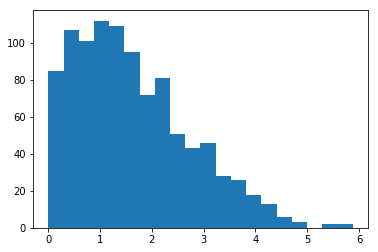

In [4]:
%matplotlib inline
plt.figure()
plt.hist(grs.dfc.loc['x_range','sampler'].rvs(1000), 20)

And that's how we sample a continuous varible

In [11]:
%matplotlib inline

def generate_training_plot(data_folder,id_str):
    
    """
    Given a folder and the ID# for a new random plot, generate it and save
    the real image in data_folder/, and the labeled image in data_folder_labels/
    """

    ### GENERATE FIGURE ###
    fig_kwargs = grs.build_kw_dict('plot_params/fig_properties.csv')
    fig, ax = grs.generate_figure(**fig_kwargs)

    ### PLOT DATA ###
    data_kwargs = grs.build_kw_dict('plot_params/data_gen.csv')
    marker_kwargs = grs.build_kw_dict('plot_params/marker_styles.csv')
    X, Y, Ye, x_spacing, y_spacing = power_data_gen(**data_kwargs)
    ax.plot(X,Y+Ye,**marker_kwargs)
    ax.set_xscale(x_spacing, nonposx='clip')
    ax.set_yscale(y_spacing, nonposy='clip')

    ### ERROR BARS ###
    error_kwargs = grs.build_kw_dict('plot_params/errorbar_styles.csv')
    error_kwargs['linestyle']='None'
    ax.errorbar(X, Y+Ye, yerr=Y*data_kwargs['noise_std_prct']/100, **error_kwargs)

    ### BOX AND GRID ###
    plt_bools = grs.build_kw_dict('plot_params/plt_boolean.csv')
    for k,v in plt_bools.items():
        eval('plt.{}({})'.format(k,v))
    plt.grid(True)

    ### TICKS ###
    tick_param_kwargs = grs.build_kw_dict('plot_params/tick_params_major.csv')
    ax.tick_params(which='major', **tick_param_kwargs)

    tick_param_minor_kwargs = grs.build_kw_dict('plot_params/tick_params_minor.csv')
    ax.tick_params(which='minor', **tick_param_minor_kwargs)

    ### TICK LABELS ###
    tick_font = font_manager.FontProperties(**grs.build_kw_dict('plot_params/font_properties.csv'))
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(tick_font)

    plt.tight_layout()
    
    ### SAVE RAW AND LABELED IMAGES ###
    fig.savefig('{}/{}.png'.format(data_folder, id_str), facecolor=fig.get_facecolor(), edgecolor='none')
    label_img = Image.fromarray(generate_label_image(fig,ax))
    label_img.save('{}/{}.png'.format(data_folder+'_labels', id_str))
    
    return fig, ax

In [7]:
from matplotlib.colors import to_rgb

def str2color(color_string):
    
    return (np.array(to_rgb(color_string))*255).astype(np.uint8)


def set_color_mask(A, M, c):
    for i in range(3):
        A_i = A[:,:,i]
        A_i[M]=c[i]
        A[:,:,i] = A_i
    return A

In [8]:
from PIL import Image
import cv2
import copy

def generate_label_image(fig,ax):
    
    mask_dict = {}
    label_colors = {'markers': str2color('xkcd:blue'),
                    'x_ticks': str2color('xkcd:dark red'),
                    'x_tick_labels': str2color('xkcd:red'),
                    'y_ticks': str2color('xkcd:violet'),
                    'y_tick_labels': str2color('xkcd:light purple'),
                    'error_bars': str2color('xkcd:dark grey'),
                    'background': str2color('xkcd:eggshell')}
    
    bg_color = np.array([int(c*255) for c in fig.get_facecolor()])[:3].astype(np.uint8)

    kids = ax.get_children()
    
    ### MARKERS ###
    visible = [1]
    for i in range(len(kids)):
        if i not in visible:
            kids[i].set_visible(False)
        else:
            kids[i].set_visible(True)
            kids[i].set_linestyle('None')
    
    fig.canvas.draw()
    class_img = np.array(fig.canvas.renderer._renderer)[:,:,:3]
    mask_dict['markers'] = ~np.all(np.isclose(class_img, bg_color, rtol=0.01), axis=-1)
    
#     ### ERROR BARS ###
#     visible = [0,3,4]
#     for i in range(len(kids)):
#         if i not in visible:
#             kids[i].set_visible(False)
#         else:
#             kids[i].set_visible(True)
    
#     fig.canvas.draw()
#     class_img = np.array(fig.canvas.renderer._renderer)[:,:,:3]
#     mask_dict['error_bars'] = ~np.all(np.isclose(class_img, bg_color, rtol=0.01), axis=-1)

    ### TICKS & LABELS ###
    
    for aa in ['x', 'y']:
        axis = eval('ax.{}axis'.format(aa))
        mlf = copy.copy(axis.get_major_formatter())
        
        # Make only the _axis visible
        [k.set_visible(False) for k in kids]
        axis.set_visible(True)
        
        # Make only the major ticks+grid visible
        [t.set_visible(False) for t in axis.get_minor_ticks()]
        axis.set_major_formatter(plt.NullFormatter())
        
        # Generate tick mask
        fig.canvas.draw_idle()
        class_img = np.array(fig.canvas.renderer._renderer)[:,:,:3]
        mask_dict[aa+'_ticks'] = ~np.all(np.isclose(class_img, bg_color, rtol=0.01), axis=-1)
        
        # Make only the tick labels visible
        axis.set_major_formatter(mlf)
        [[ch.set_visible(False) for ch in tick.get_children() if not hasattr(ch,'_text')] for tick in axis.get_major_ticks()]
        [g.set_visible(False) for g in axis.get_gridlines()]
        
        # Generate label mask
        fig.canvas.draw_idle()
        class_img = np.array(fig.canvas.renderer._renderer)[:,:,:3]
        cv2.imwrite('temp/label_test.png',class_img)
        mask_dict[aa+'_tick_labels'] = ~np.all(np.isclose(class_img, bg_color, rtol=0.01), axis=-1)
        
        # Reset visibilities
        [k.set_visible(True) for k in kids]
        [t.set_visible(True) for t in axis.get_major_ticks()]
        [t.set_visible(True) for t in axis.get_minor_ticks()]
        [g.set_visible(True) for g in axis.get_gridlines()]
    
    ### FINAL LABEL IMAGE ###
    
    label_image = np.zeros(class_img.shape).astype(np.uint8)
    for kk, mm in mask_dict.items():
        label_image = set_color_mask(label_image, mm, label_colors[kk])
    
    bg_mask = np.all(label_image==np.zeros(3).astype(np.uint8), axis=-1)
    label_image = set_color_mask(label_image, bg_mask, label_colors['background'])
    
    return label_image

In [9]:
def power_data_gen(x_min=0, x_range=3, n_points=20,
                   poly_scale=1, poly_deg=1,
                   noise_std_prct=10):
    
    log_cutoff = 3
    
    if x_range>log_cutoff:
        x_spacing='log'
        X = np.logspace(x_min,
                        x_min + x_range,
                        n_points)
    else:
        X = np.linspace(10**x_min,
                        10**x_min + 10**x_range,
                        n_points)
        x_spacing='linear'
        
    Y = poly_scale * X ** poly_deg
    
    y_spacing = 'linear' if max(Y)*min(Y)<0 or np.abs(np.log10(max(Y)/min(Y)))<log_cutoff else 'log'
    if y_spacing=='log' and np.any(Y<0):
        Y = np.abs(Y)
    
    Y_err = np.random.normal(loc=np.zeros(Y.shape), scale=np.abs(Y*noise_std_prct/100))
    
    return X, Y, Y_err, x_spacing, y_spacing

/anaconda/envs/graphs/lib/python3.5/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


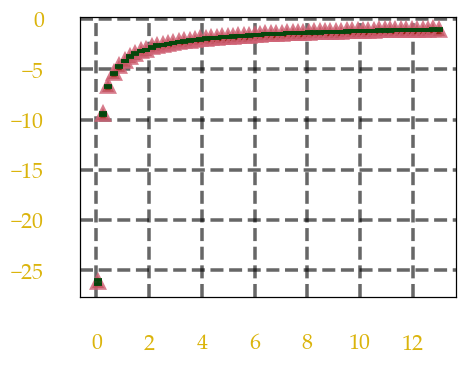

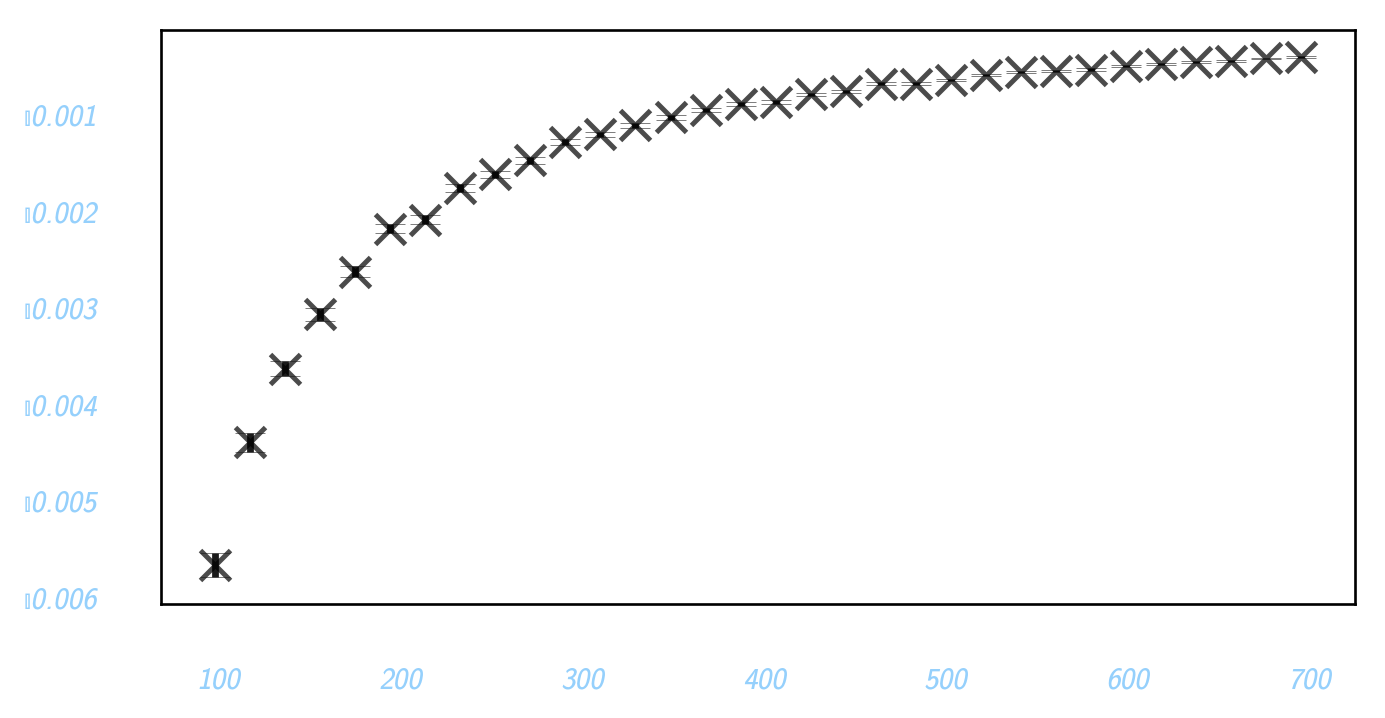

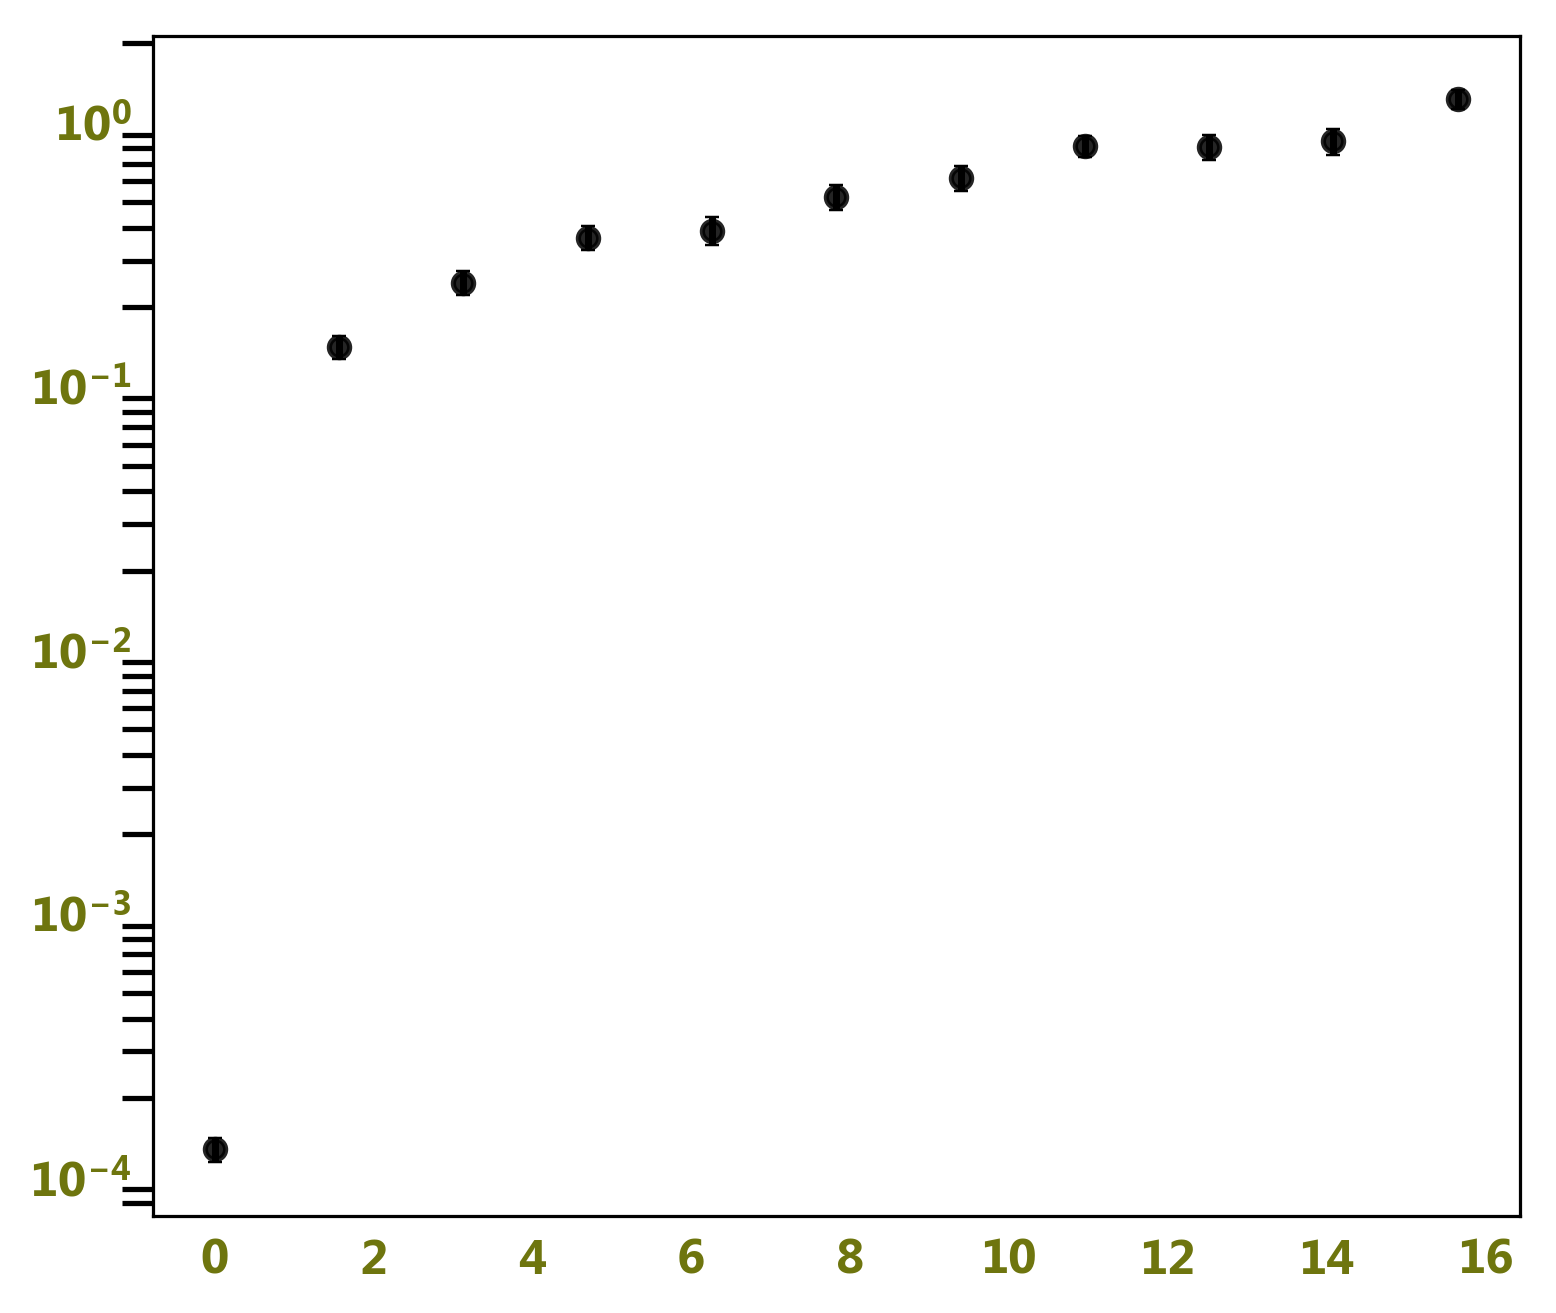

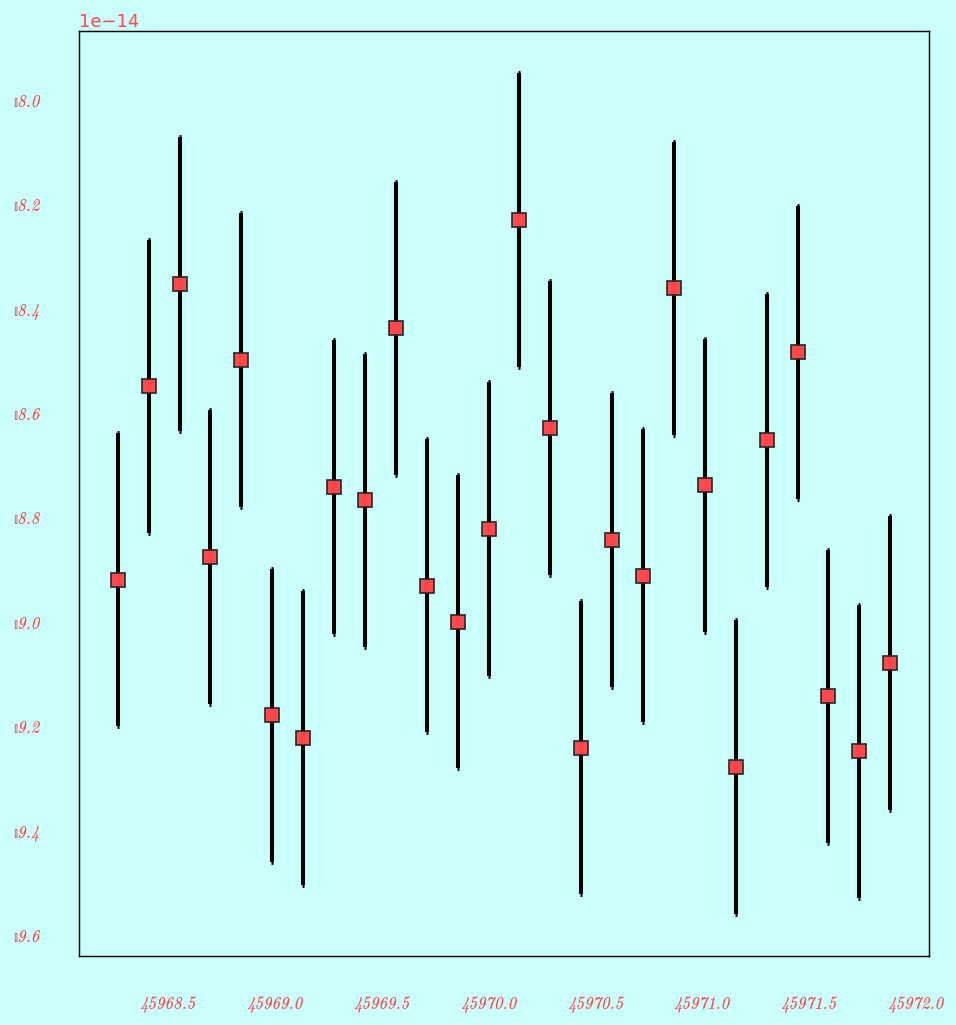

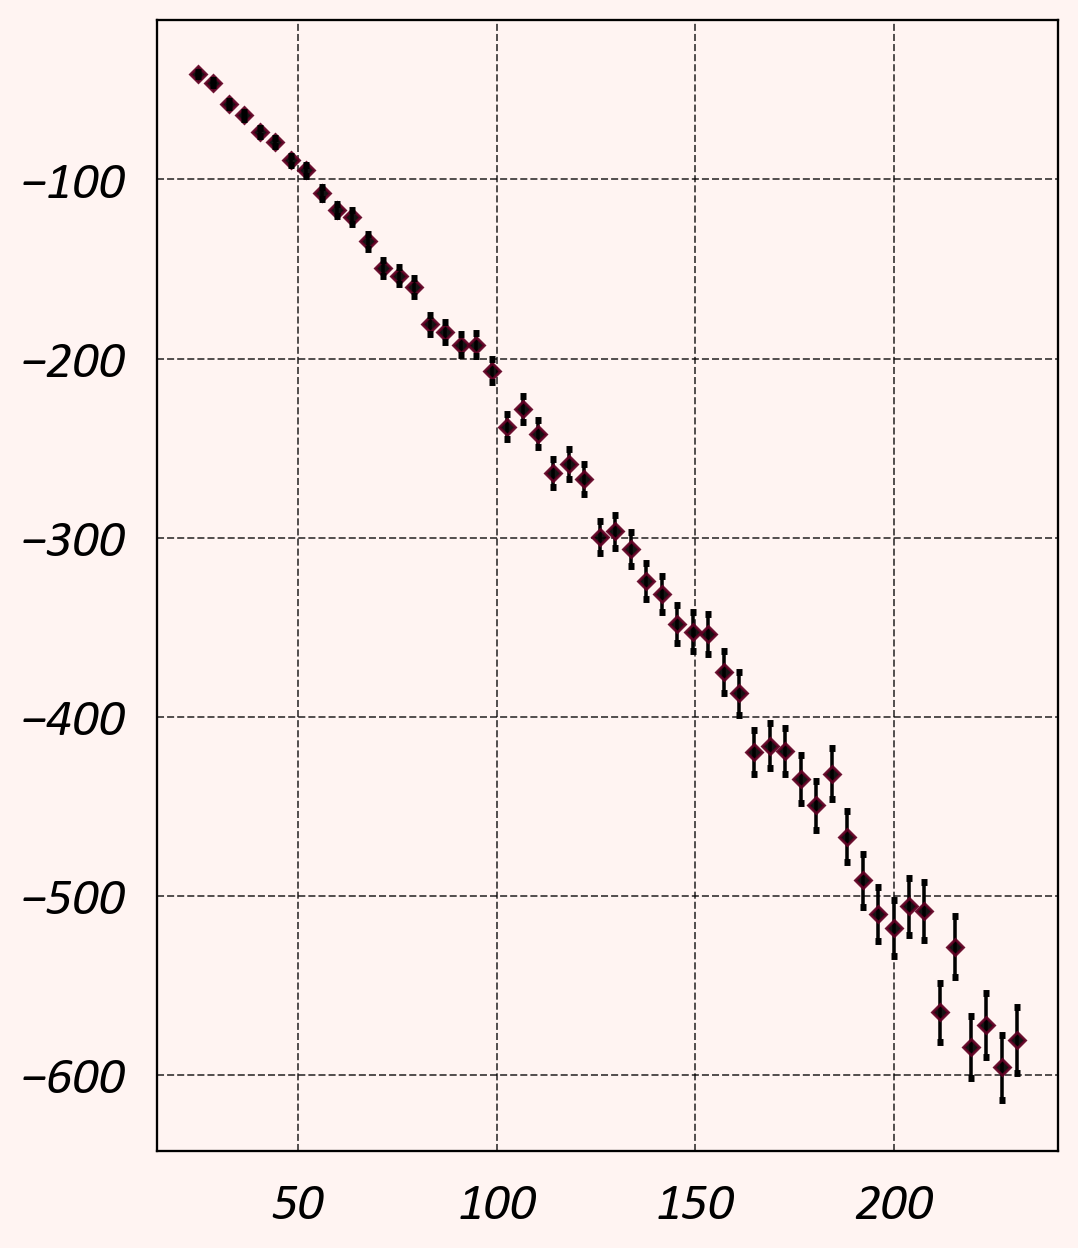

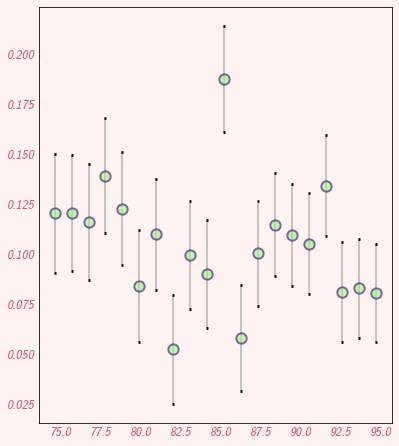

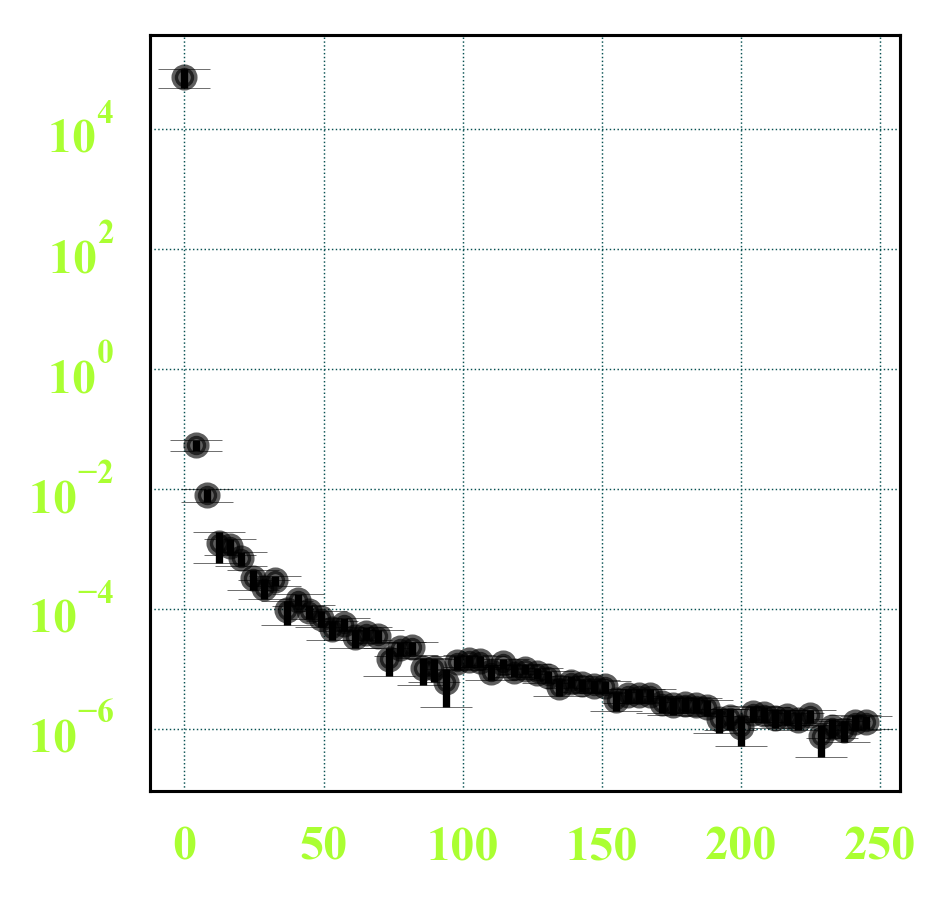

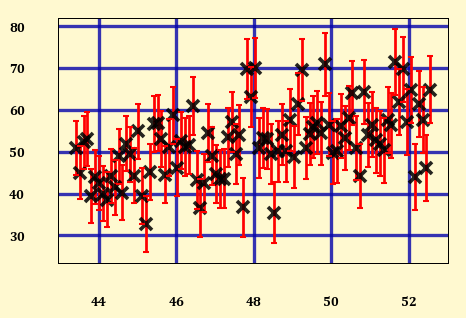

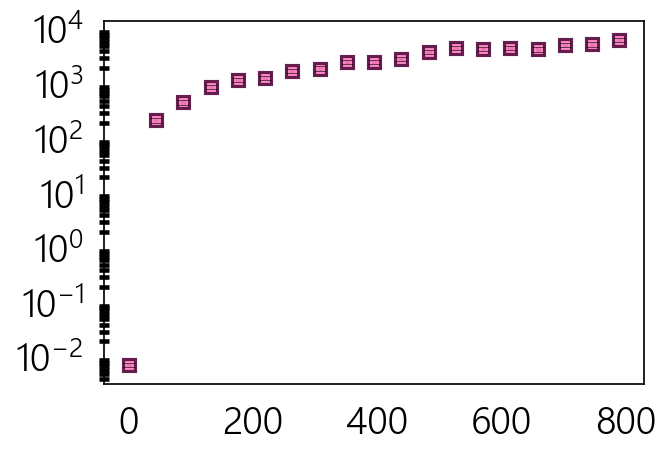

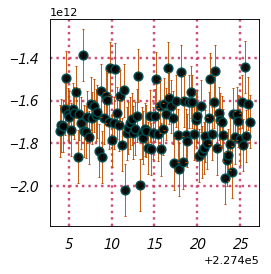

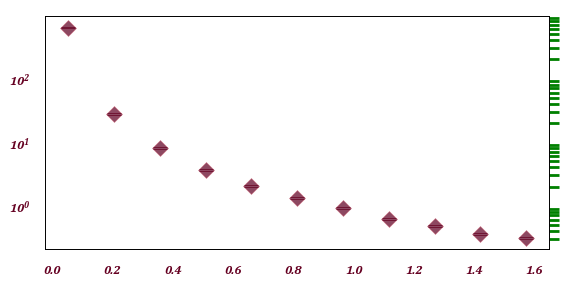

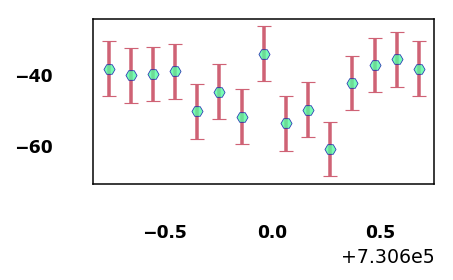

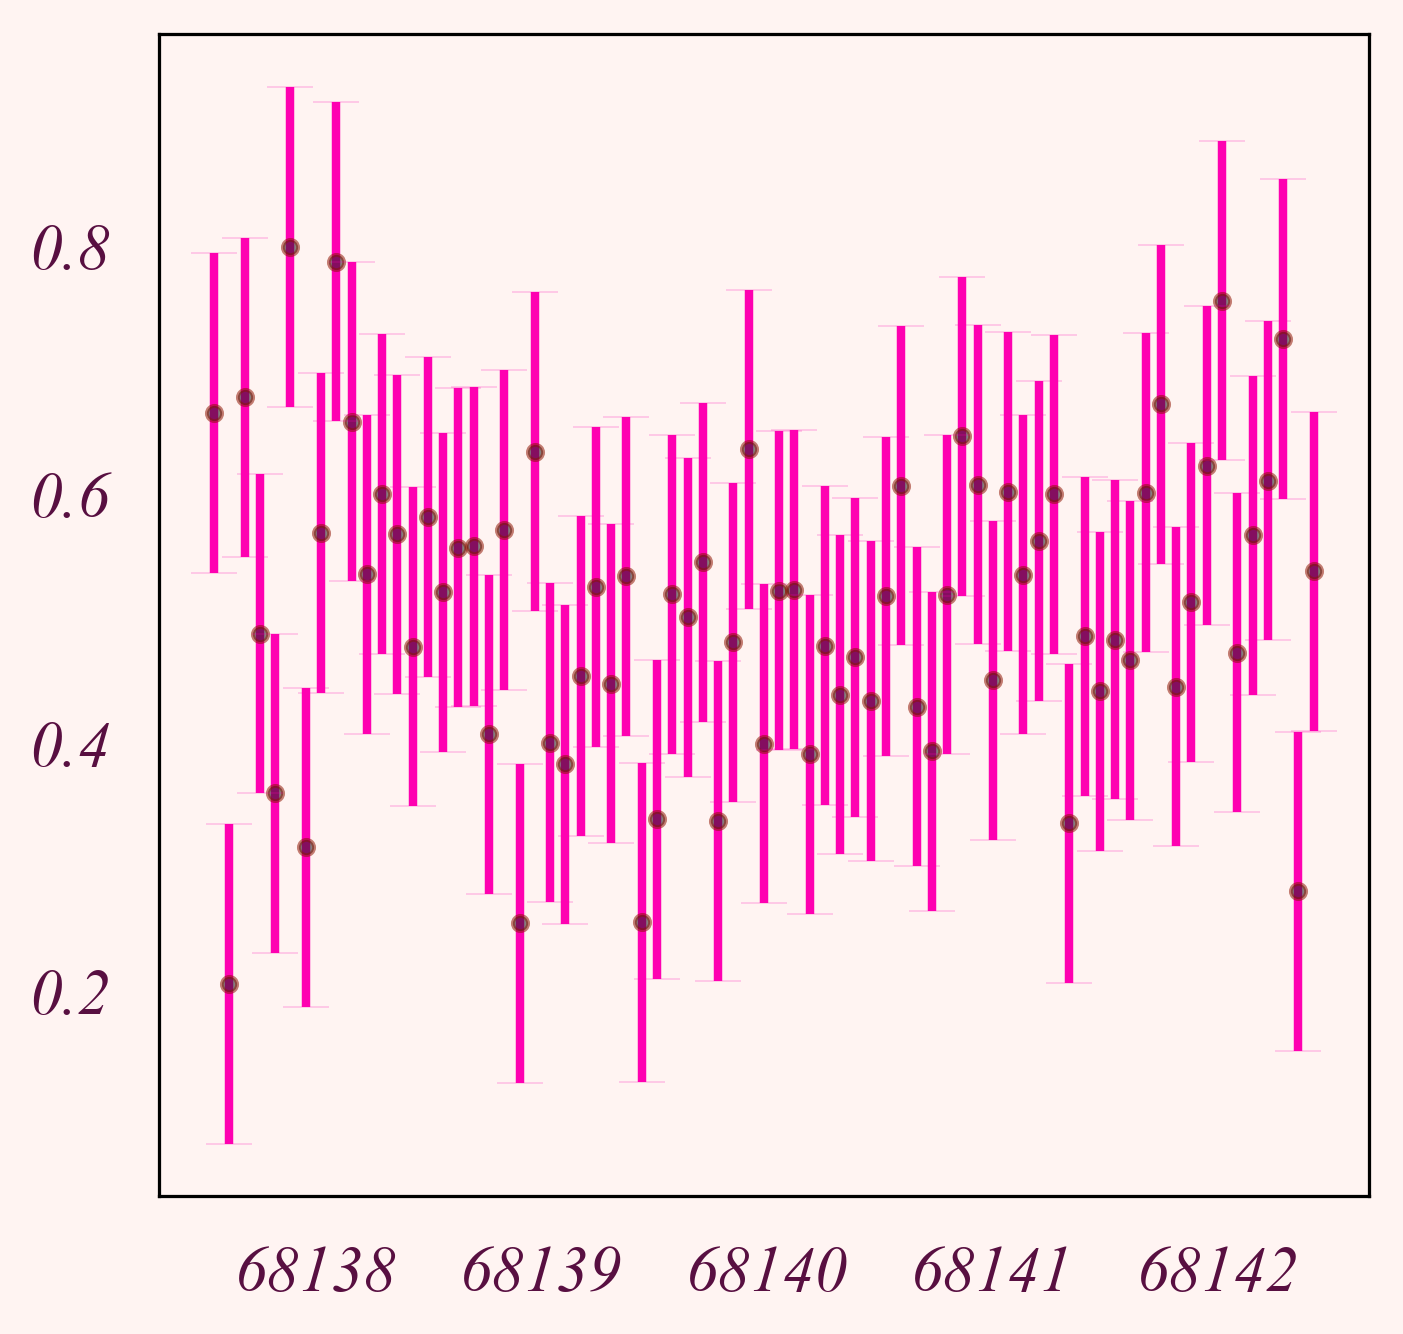

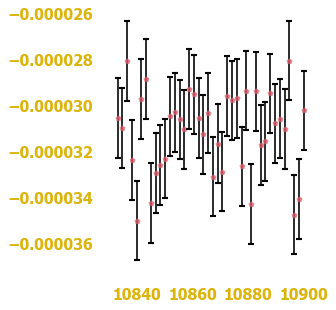

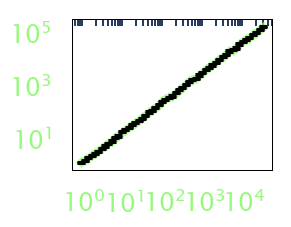

In [499]:
import os

base_folder = '/Users/nils/CC/Semantic-Segmentation-Suite/graphs1'
for dataset in ['train', 'val', 'test']:
    os.makedirs(os.path.join(base_folder, dataset), exist_ok=True)
    os.makedirs(os.path.join(base_folder, dataset+'_labels'), exist_ok=True)

for dataset in ['train', 'val', 'test']:
    for i in range(5):
        data_folder = os.path.join(base_folder, dataset)
        generate_training_plot(data_folder, str(i).zfill(6))

/anaconda/envs/graphs/lib/python3.5/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


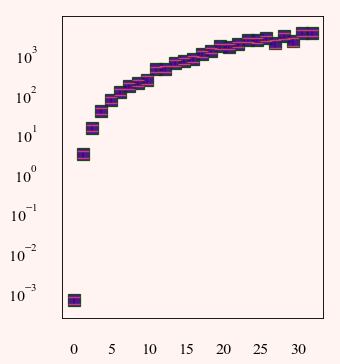

In [12]:
fig, ax = generate_training_plot('temp','00')

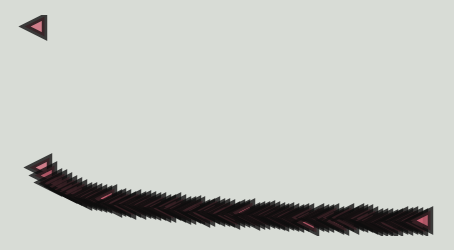

In [459]:
mask_dict = {}
label_colors = {'markers': str2color('xkcd:blue'),
                'x_ticks': str2color('xkcd:dark red'),
                'x_tick_labels': str2color('xkcd:red'),
                'y_ticks': str2color('xkcd:violet'),
                'y_tick_labels': str2color('xkcd:light purple'),
                'error_bars': str2color('xkcd:dark grey'),
                'background': str2color('xkcd:eggshell')}

bg_color = np.array([int(c*255) for c in fig.get_facecolor()])[:3].astype(np.uint8)

kids = ax.get_children()

### MARKERS ###
visible = [1]
for i in range(len(kids)):
    if i not in visible:
        kids[i].set_visible(False)
    else:
        kids[i].set_visible(True)
        kids[i].set_linestyle('None')

fig.canvas.draw()
class_img = np.array(fig.canvas.renderer._renderer)[:,:,:3]
mask_dict['markers'] = ~np.all(np.isclose(class_img, bg_color, rtol=0.01), axis=-1)

#     ### ERROR BARS ###
#     visible = [0,3,4]
#     for i in range(len(kids)):
#         if i not in visible:
#             kids[i].set_visible(False)
#         else:
#             kids[i].set_visible(True)

#     fig.canvas.draw()
#     class_img = np.array(fig.canvas.renderer._renderer)[:,:,:3]
#     mask_dict['error_bars'] = ~np.all(np.isclose(class_img, bg_color, rtol=0.01), axis=-1)

fig

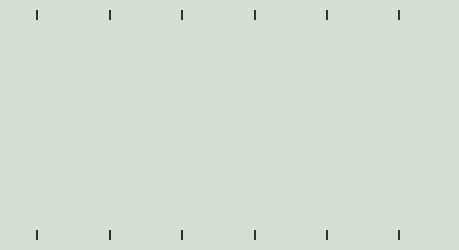

In [460]:
### TICKS & LABELS ###
aa='x'
axis = eval('ax.{}axis'.format(aa))
mlf = copy.copy(axis.get_major_formatter())

# Make only the _axis visible
[k.set_visible(False) for k in kids]
axis.set_visible(True)

# Make only the major ticks+grid visible
[t.set_visible(False) for t in axis.get_minor_ticks()]
axis.set_major_formatter(plt.NullFormatter())

# Generate tick mask
fig.canvas.draw_idle()
class_img = np.array(fig.canvas.renderer._renderer)[:,:,:3]
mask_dict[aa+'_ticks'] = ~np.all(np.isclose(class_img, bg_color, rtol=0.01), axis=-1)

fig

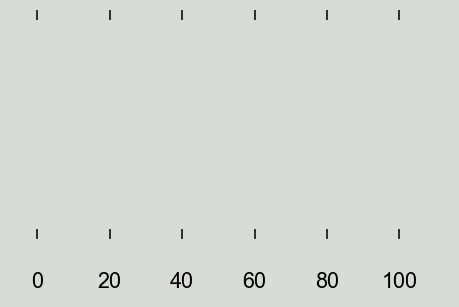

In [461]:
# Make only the tick labels visible
axis.set_major_formatter(mlf)
fig

In [475]:
isinstance(tick.get_children()[-1],Text)

NameError: name 'Text' is not defined

In [485]:
vars(tick.get_children()[-1])

{'_agg_filter': None,
 '_alpha': None,
 '_animated': False,
 '_axes': None,
 '_bbox_patch': None,
 '_clipon': True,
 '_clippath': None,
 '_color': 'k',
 '_contains': None,
 '_fontproperties': <matplotlib.font_manager.FontProperties at 0x1a28059a90>,
 '_gid': None,
 '_horizontalalignment': 'center',
 '_in_layout': True,
 '_label': '',
 '_linespacing': 1.2,
 '_mouseover': False,
 '_multialignment': None,
 '_oid': 0,
 '_path_effects': [],
 '_picker': None,
 '_propobservers': {},
 '_rasterized': None,
 '_remove_method': None,
 '_renderer': None,
 '_rotation': None,
 '_rotation_mode': None,
 '_sketch': None,
 '_snap': None,
 '_stale': True,
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_text': '−20',
 '_transform': <matplotlib.transforms.CompositeGenericTransform at 0x1a25fb2be0>,
 '_transformSet': True,
 '_url': None,
 '_usetex': False,
 '_verticalalignment': 'bottom',
 '_visible': False,
 '_wrap': False,
 '_x': 0,
 '_y': 1,
 'clipbox': None,
 'eventson': False,
 'figure': <Figure size 552.625x

In [490]:
# tick = axis.get_major_ticks()[0]
[[c.set_visible(True) for c in tick.get_children()] for tick in axis.get_major_ticks()]
[[c.set_visible(False) for c in tick.get_children() if not hasattr(c,'_text')] for tick in axis.get_major_ticks()]

[[None, None, None],
 [None, None, None],
 [None, None, None],
 [None, None, None],
 [None, None, None],
 [None, None, None],
 [None, None, None],
 [None, None, None]]

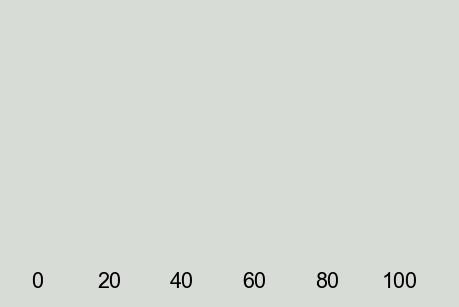

In [491]:
fig

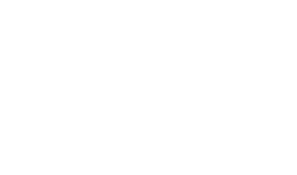

In [457]:
[[ch.set_visible(False) for ch in tick.get_children() if not hasattr(ch,'_text')] for tick in axis.get_major_ticks()]
[l.set_visible(True) for l in axis.get_ticklabels()]
[g.set_visible(False) for g in axis.get_gridlines()]

# Generate label mask
fig.canvas.draw_idle()
class_img = np.array(fig.canvas.renderer._renderer)[:,:,:3]
cv2.imwrite('temp/label_test.png',class_img)
mask_dict[aa+'_tick_labels'] = ~np.all(np.isclose(class_img, bg_color, rtol=0.01), axis=-1)

fig

In [ ]:
# Reset visibilities
[k.set_visible(True) for k in kids]
[t.set_visible(True) for t in axis.get_major_ticks()]
[t.set_visible(True) for t in axis.get_minor_ticks()]
[g.set_visible(True) for g in axis.get_gridlines()]

### FINAL LABEL IMAGE ###

label_image = np.zeros(class_img.shape).astype(np.uint8)
for kk, mm in mask_dict.items():
    label_image = set_color_mask(label_image, mm, label_colors[kk])

bg_mask = np.all(label_image==np.zeros(3).astype(np.uint8), axis=-1)
label_image = set_color_mask(label_image, bg_mask, label_colors['background'])

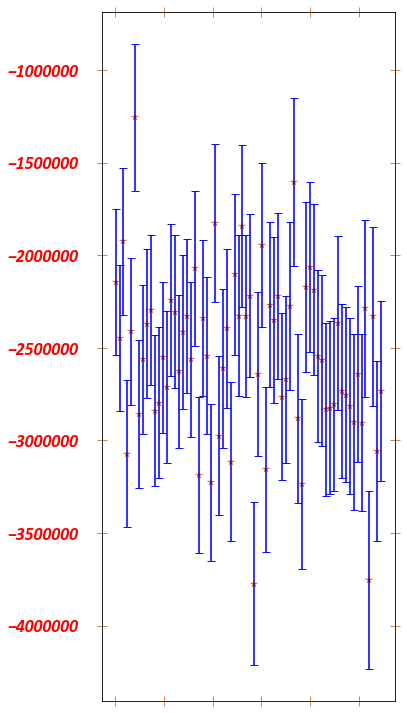

In [423]:
import copy
mlf = copy.copy(ax.xaxis.get_major_formatter())
ax.xaxis.set_major_formatter(plt.NullFormatter())
fig

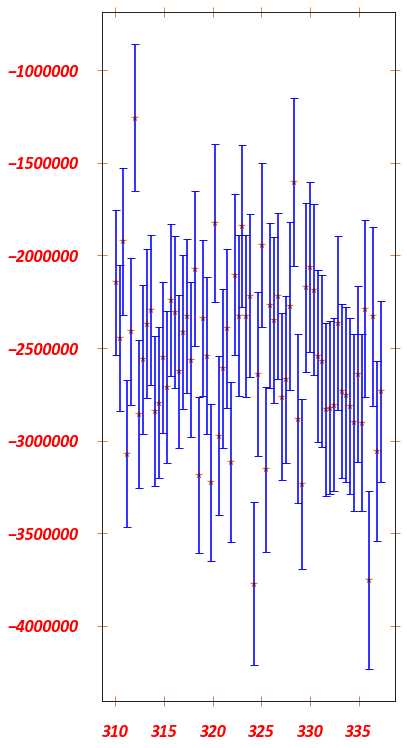

In [424]:
ax.xaxis.set_major_formatter(mlf)
fig

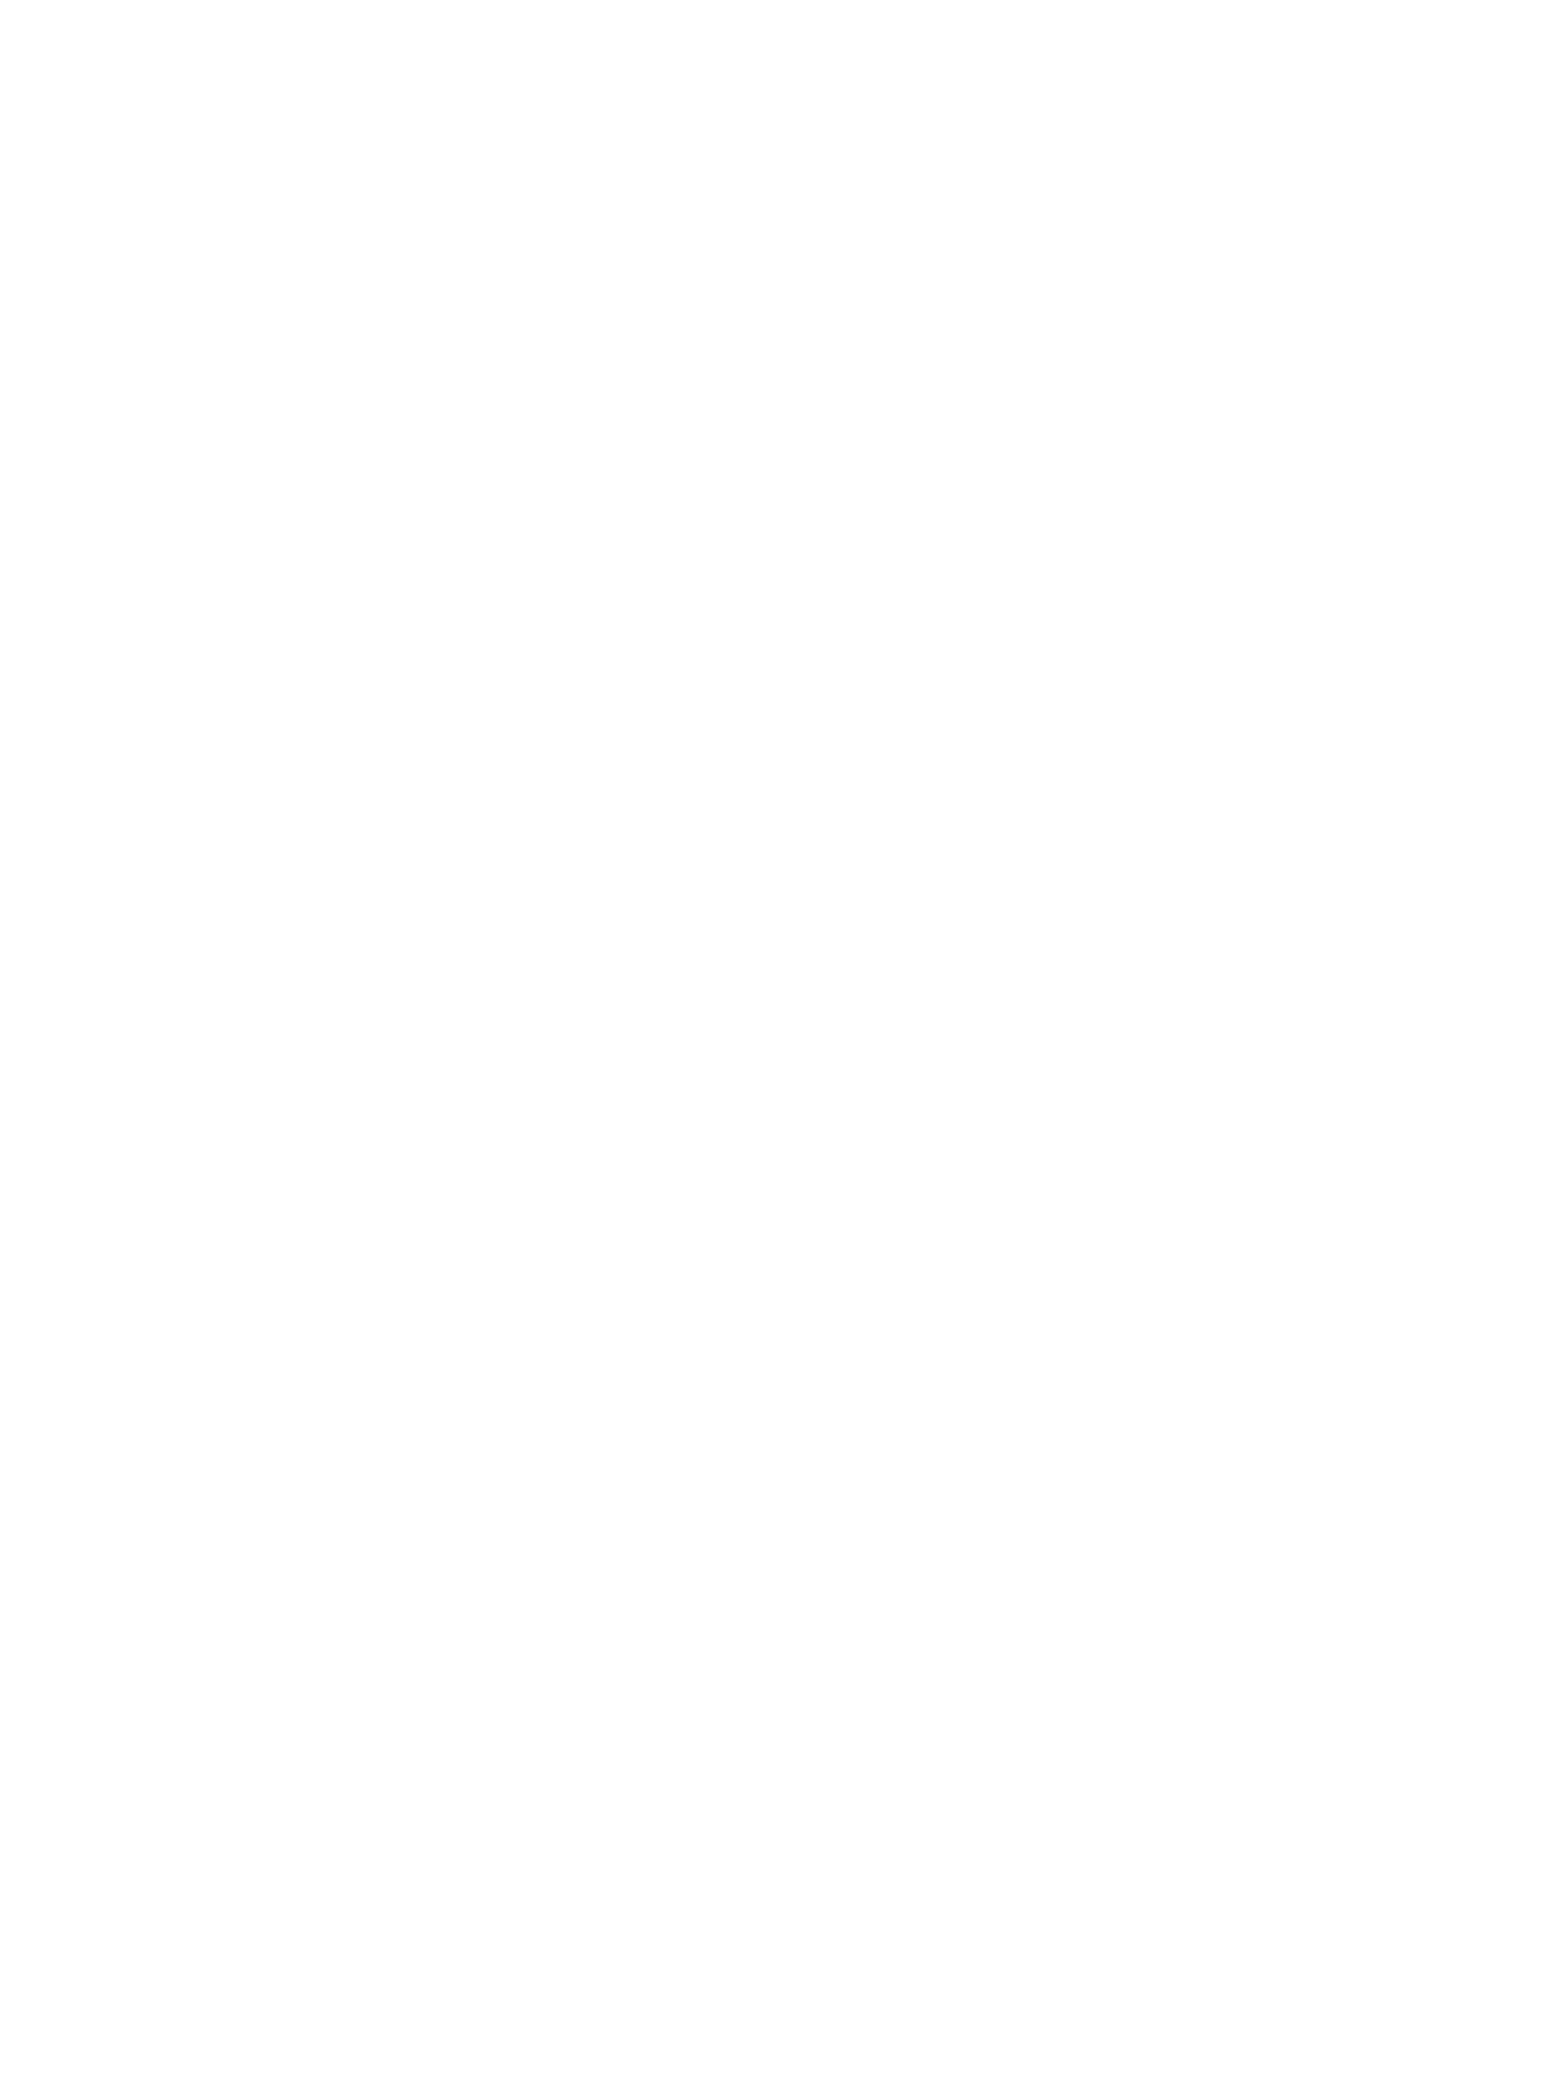

In [417]:
kids = ax.get_children()
bg_color = fig.get_facecolor()[:3]
for aa in ['x']:
    axis = eval('ax.{}axis'.format(aa))

    # Make only the _axis visible
    [k.set_visible(False) for k in kids]
    axis.set_visible(True)

    # Make only the major ticks+grid visible
    [t.set_visible(False) for t in axis.get_minor_ticks()]
    axis.set_major_formatter(plt.NullFormatter())

    # Generate tick mask
    fig.canvas.draw()
    class_img = np.array(fig.canvas.renderer._renderer)[:,:,:3]
#     mask_dict[aa+'_ticks'] = ~np.all(np.isclose(class_img, bg_color, rtol=0.01), axis=-1)

    # Make only the tick labels visible
    axis.set_major_formatter(plt.ScalarFormatter())
    [t.set_visible(False) for t in axis.get_major_ticks()]
    [g.set_visible(False) for g in axis.get_gridlines()]

    # Generate label mask
    fig.canvas.draw()
#     class_img = np.array(fig.canvas.renderer._renderer)[:,:,:3]
#     mask_dict[aa+'_tick_labels'] = ~np.all(np.isclose(class_img, bg_color, rtol=0.01), axis=-1)

#     # Reset visibilities
#     [k.set_visible(True) for k in kids]
#     [t.set_visible(True) for t in axis.get_major_ticks()]
#     [t.set_visible(True) for t in axis.get_minor_ticks()]
#     [g.set_visible(True) for g in axis.get_gridlines()]

fig

In [416]:
ax.xaxis.get_ticklabels()[0]

Text(6700.0, 0, '6700')

In [303]:
X = np.array(fig.canvas.renderer._renderer)
X.shape

(1950, 1546, 4)

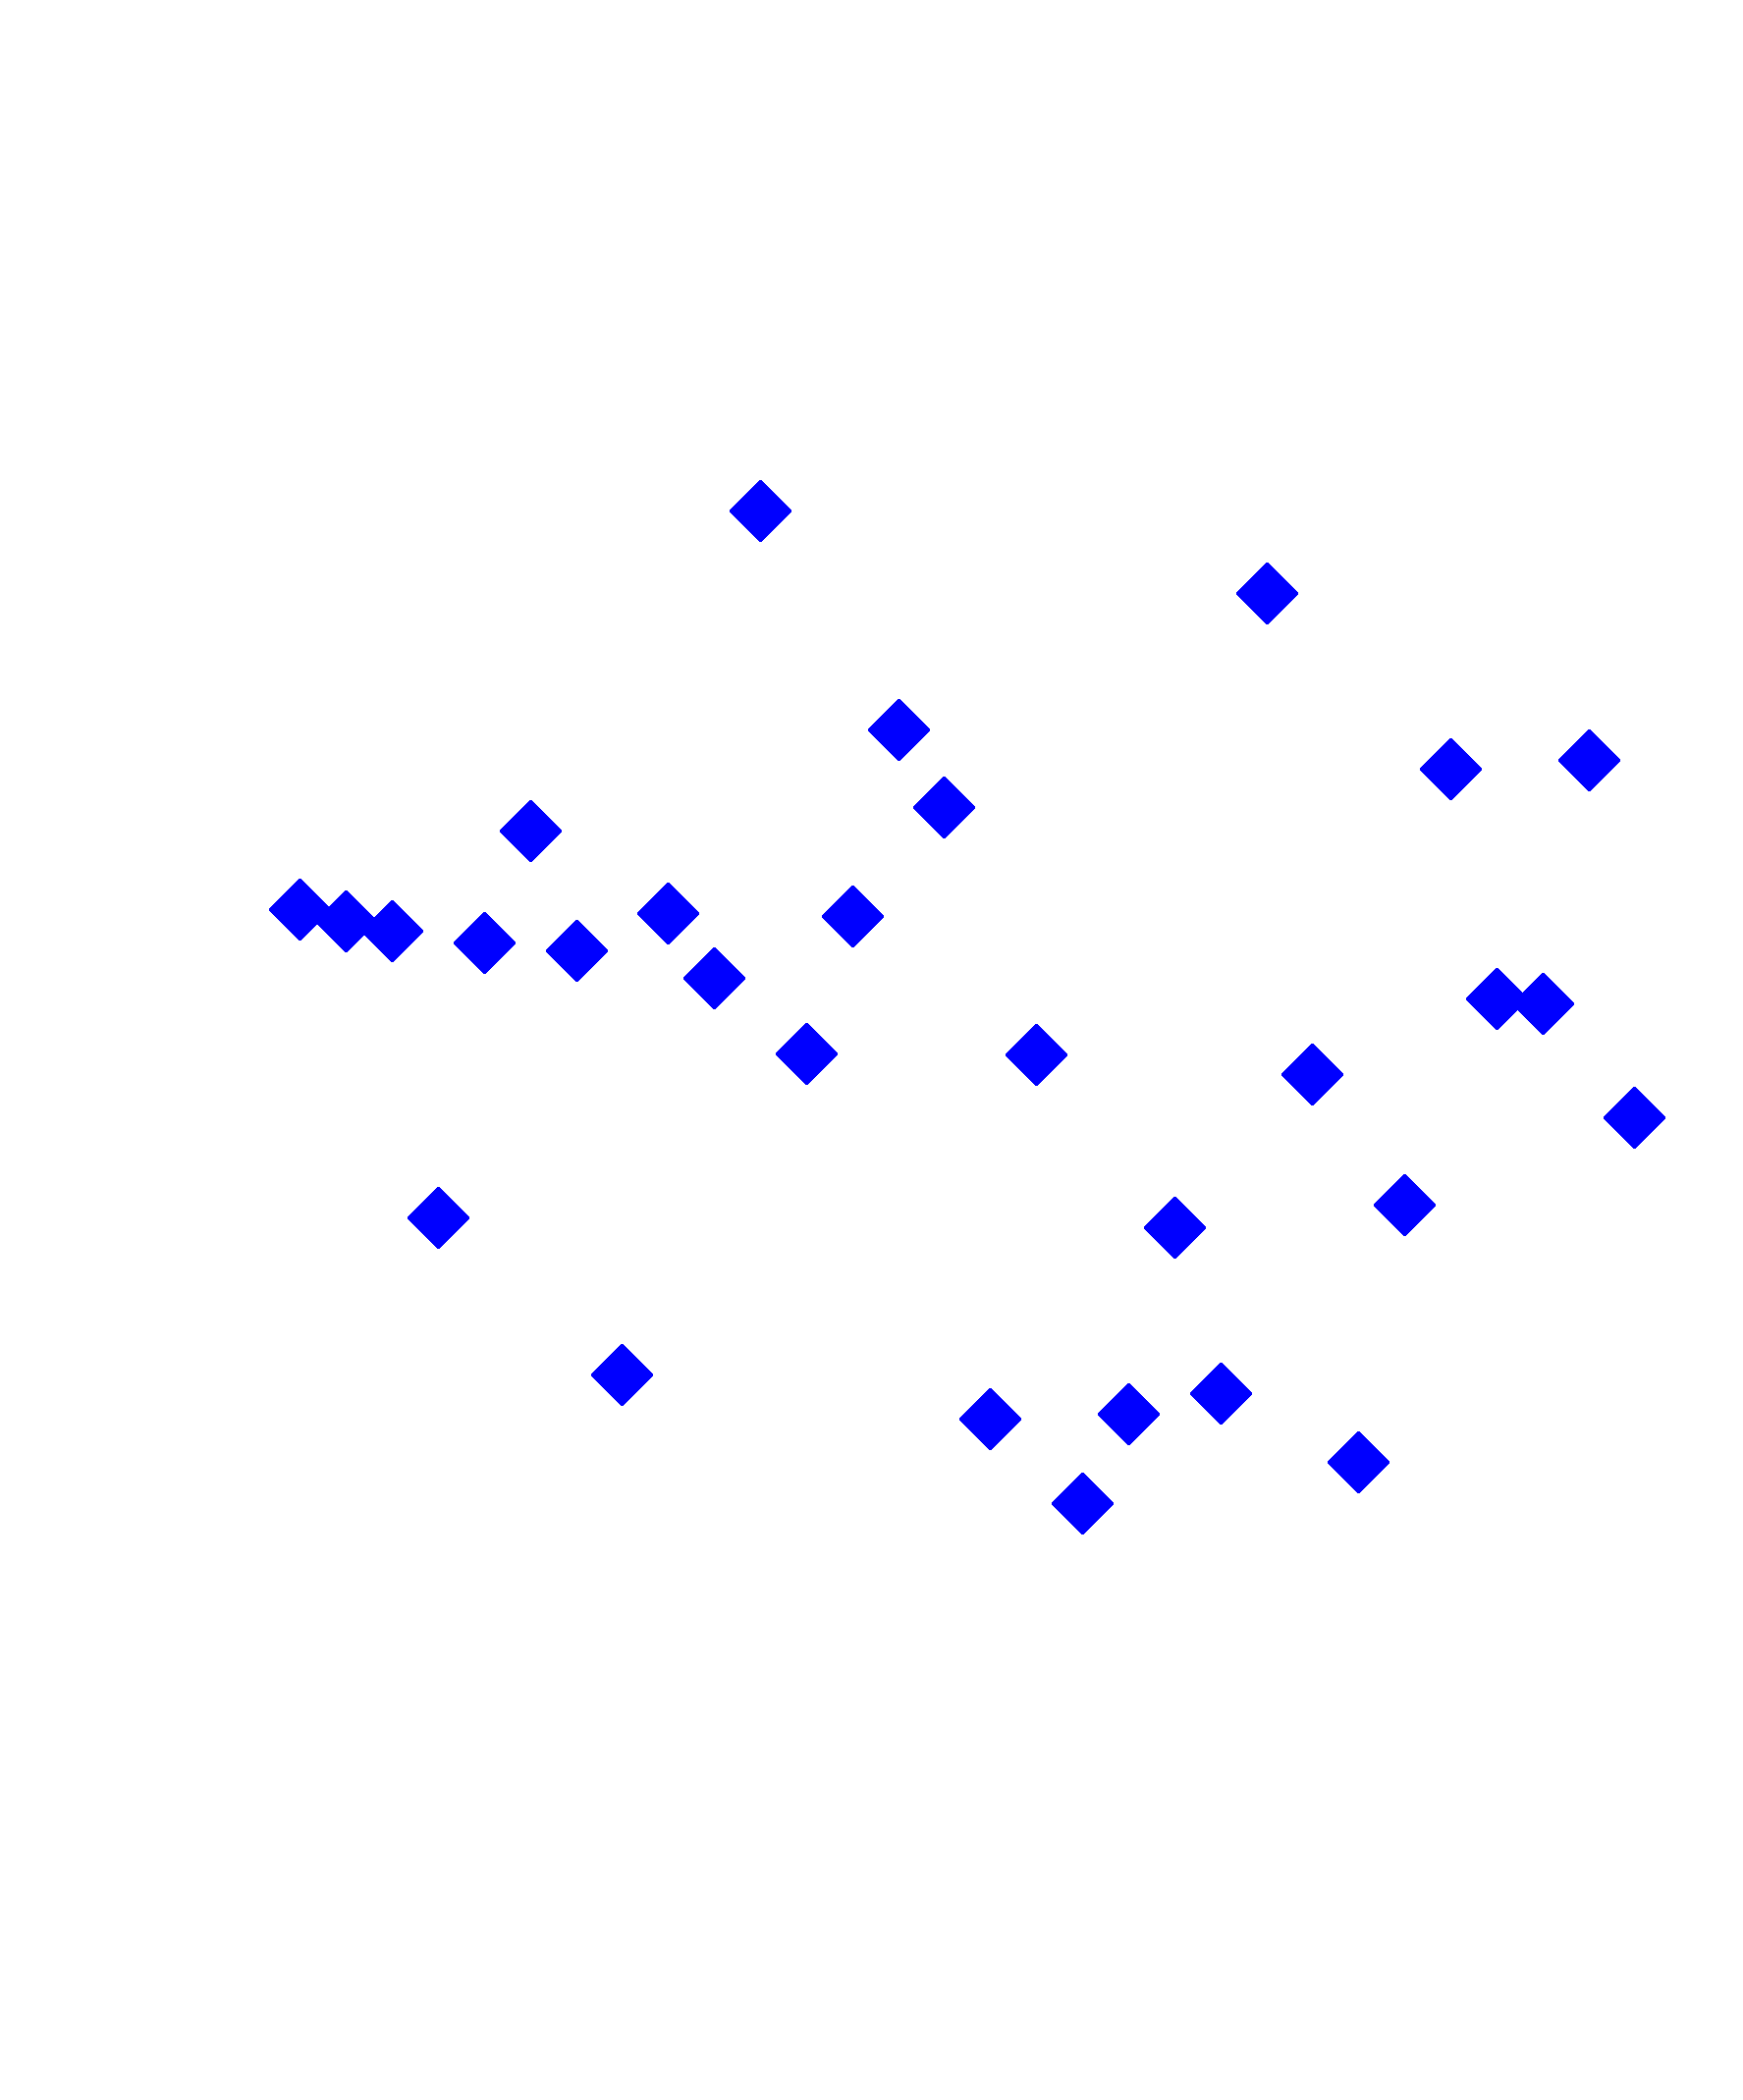

In [279]:
label_img = Image.fromarray(generate_label_image(fig,ax))
label_img.save('test1_labeled.png')
label_img

In [316]:
def show_visible(fig, ax, visible):
    
    kids = ax.get_children()
    
    for i in range(len(kids)):
        if i not in visible:
            kids[i]._visible=False
        else:
            kids[i]._visible=True
#             kids[i].set_linestyle('None')
    
    return fig

In [387]:
tick = ax.xaxis.get_major_ticks()[0]
tick._visible

In [320]:
ax.get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [322]:
os.makedirs('temp', exist_ok=True)
for i in range(len(ax.get_children())):
    
    f_i = show_visible(fig, ax, [i])
    f_i.savefig('temp/visible_{}.png'.format(i), facecolor=fig.get_facecolor(), edgecolor='none')

In [233]:
bg_color = np.array([int(c*255) for c in fig.get_facecolor()]).astype(np.uint8)
bg_color

array([255, 255, 255, 255], dtype=uint8)

In [197]:
np.asarray(Image.open('test1.png')).shape

(1426, 1198, 4)

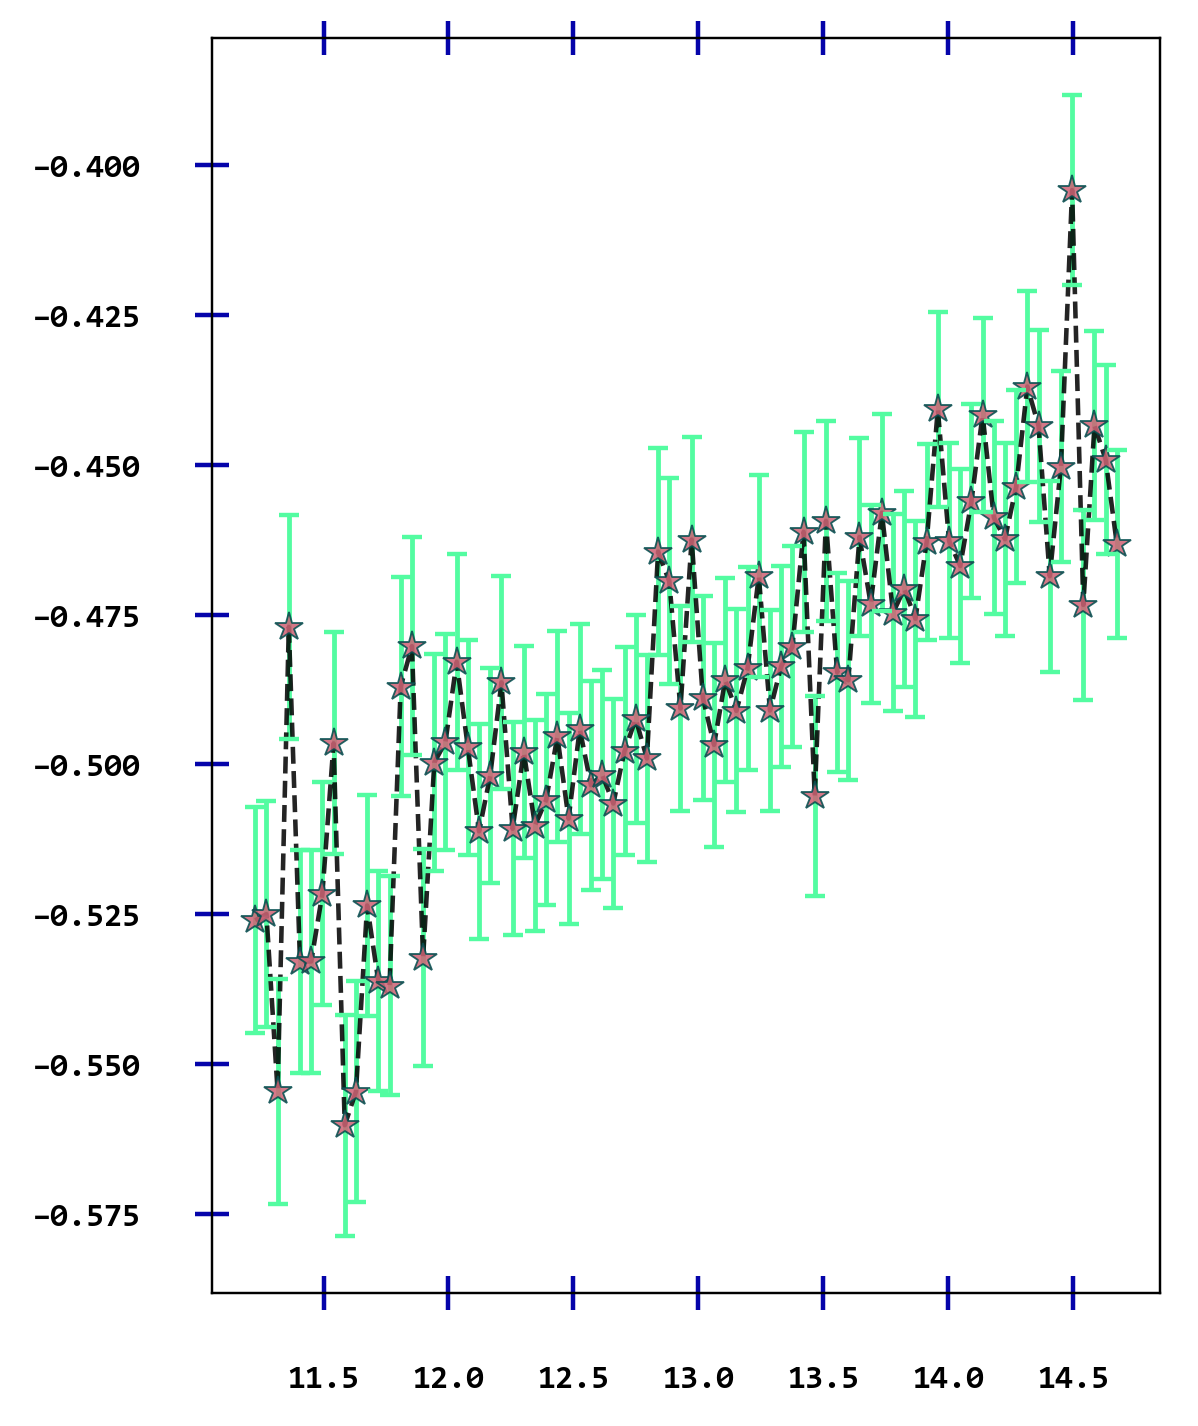

In [198]:
Image.open('test1.png')

In [202]:
figimg = fig2data(fig)
figimg.shape

(1426, 1198, 4)

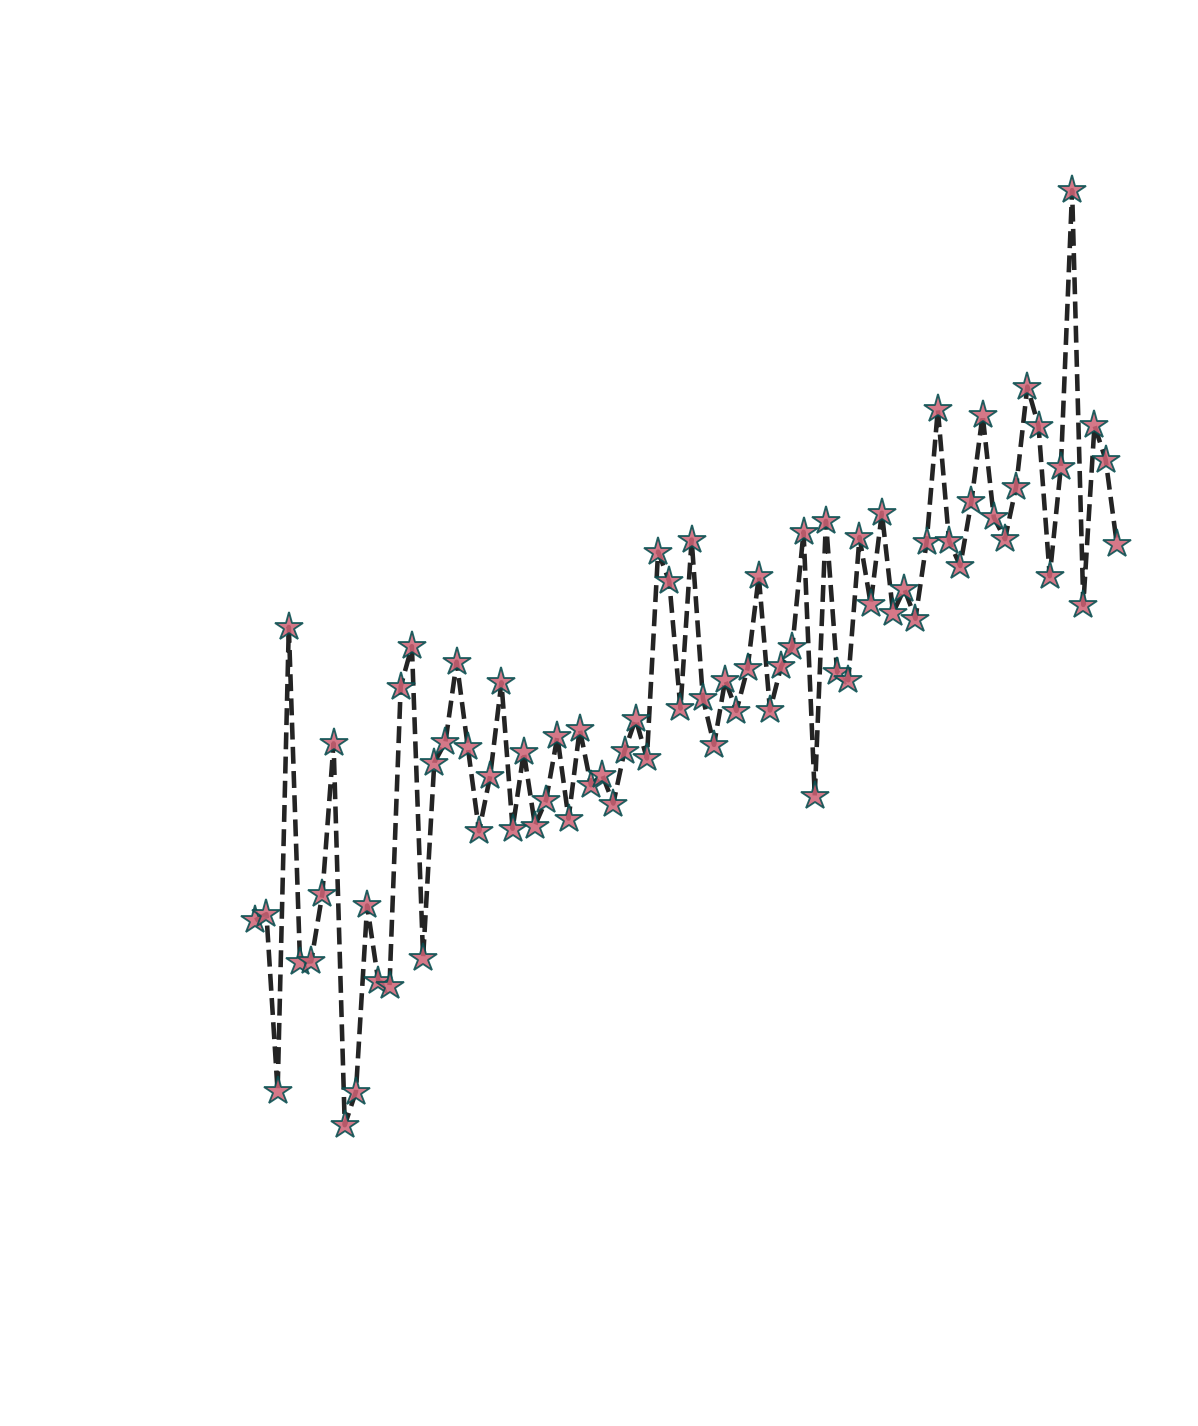

In [205]:
fig2img(fig)

In [206]:
np.asarray(fig2img(fig)).shape

(1426, 1198, 4)

In [172]:
fig.savefig('test2', facecolor=fig.get_facecolor(), edgecolor='none')

In [167]:
fig.get_facecolor()

(1.0, 1.0, 0.8313725490196079, 1.0)

In [155]:
fig.bbox_inches

Bbox([[0.0, 0.0], [3.477252684974654, 1.8418435323587614]])

In [156]:
fig_kwargs

{'dpi': 225.9147027379281,
 'facecolor': 'w',
 'figaspect': 1.887919697783178,
 'figwidth': 3.477252684974654}

In [9]:
data_kwargs

{'n_points': 115.21006135585121,
 'noise_std_prct': 12.812025219582964,
 'poly_deg': 2.9647868075344537,
 'poly_scale': -2.8374481262390567,
 'x_min': 2.9746975821504087,
 'x_range': 2.8104146110814874}

In [514]:
fig_kwargs

{'dpi': 195.4897719421928,
 'facecolor': 'xkcd:light grey',
 'figaspect': 0.5614630787376915,
 'figwidth': 4.689584682709649}

In [272]:
grs.generate_plots(1,'test','test/')

In [273]:
from PIL import Image

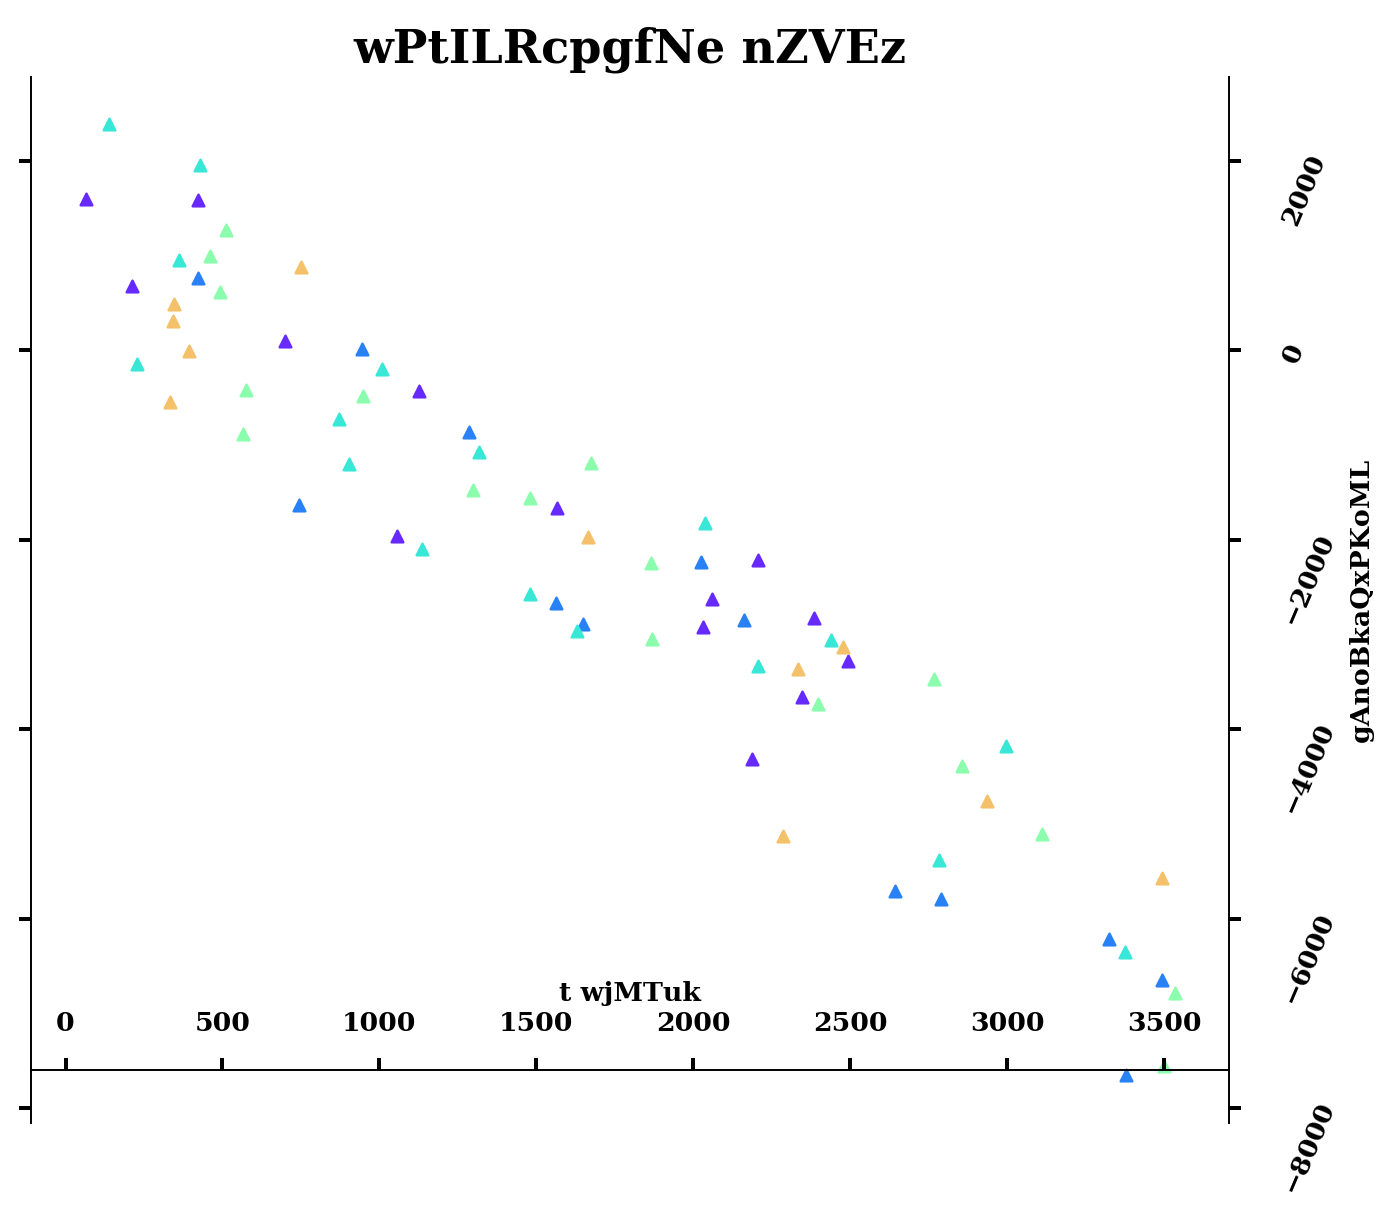

In [274]:
Image.open('data/test/plots/test_1.png')

## Need a way to generate a font

In [381]:
font_kw_dict = grs.build_kw_dict('plot_params/font_properties.csv')
fp = font_manager.FontProperties(**font_kw_dict)
fp

# Then there's the issue of actually making fake plots

The OG code base has all kinds of hard-coded distributions and decisions and makes a lot of weird choices in how to vary the plot aspects. There's about 20 lines of code just for varying markers within a series, which is something nobody does.

What we're looking for is the easiest way to feed something like a kwargs for figure and axes

In [113]:
%matplotlib inline
F = plt.figure(**{'figsize':(5,4), 'dpi':100})

<Figure size 500x400 with 0 Axes>

In [134]:
len(plt.style.available)

25

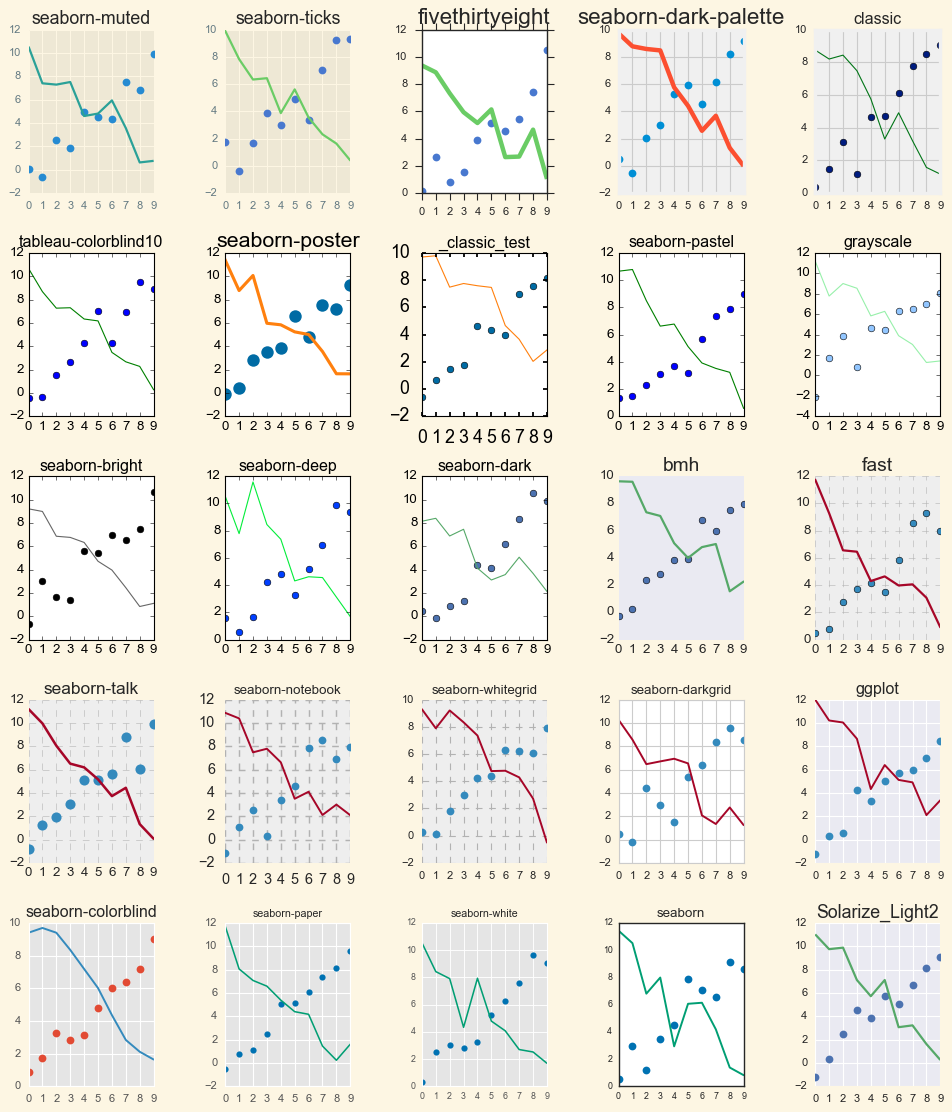

In [141]:
fig = plt.figure(figsize=(12,14))
plt.subplots()
for ii in range(25):
    plt.subplot(5,5,ii+1)
    plt.style.use(plt.style.available[ii])
    plt.plot(np.arange(10),np.arange(10)+np.random.normal(0,1,size=10),'o',
             np.arange(10),np.arange(10,0,-1)+np.random.normal(0,1,size=10),'-')
    plt.title(plt.style.available[ii])
    
plt.tight_layout()

In [165]:
dfd.markers.shape

(14,)

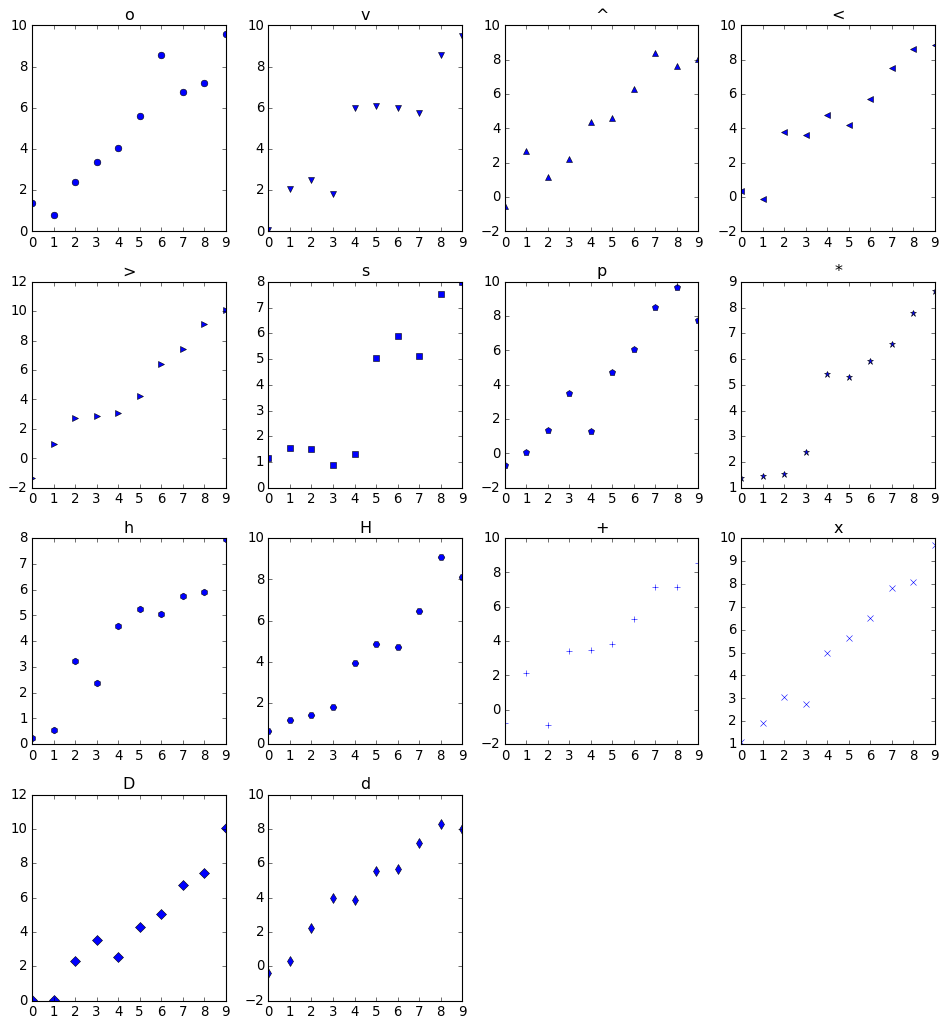

In [169]:
plt.style.use('_classic_test')
plt.figure(figsize=(12,13), facecolor='w')
for ii in range(14):
    plt.subplot(4,4,ii+1)
    plt.plot(np.arange(10),np.arange(10)+np.random.normal(0,1,size=10),dfd.markers.iloc[ii])
    plt.title(dfd.markers.iloc[ii])
    
plt.tight_layout()

In [123]:
plt.style.available

['seaborn-muted',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-dark-palette',
 'classic',
 'tableau-colorblind10',
 'seaborn-poster',
 '_classic_test',
 'seaborn-pastel',
 'grayscale',
 'seaborn-bright',
 'seaborn-deep',
 'seaborn-dark',
 'bmh',
 'fast',
 'seaborn-talk',
 'seaborn-notebook',
 'seaborn-whitegrid',
 'seaborn-darkgrid',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-paper',
 'seaborn-white',
 'seaborn',
 'Solarize_Light2']

# We need a more robust data generator

In [190]:
dom = pd.Interval(0,np.inf,'left')
np.all([d in dom for d in (0,np.inf)])

False

In [224]:
class noise_generator:
    
    def __init__(self, scale=1, mode='prop', rv=stats.norm, loc=0):
        """
        rv is an rv_continuous object from scipy.stats

        There are two modes:
            'abs': add absolute noise (std. dev. = same units as data)
            'prop': add proportional noise (std. dev. of 1 = 1% of range of A)
        
        'loc' is the mean of the noise... anything other than 0 will
        apply an overall shift to the data
        """
        self.scale = scale
        self.mode = mode
        self.rv = rv
        self.loc = loc

    def add_noise(self, A):
        
        if self.mode=='abs':
            return A + self.rv(loc=self.loc,
                               scale=self.scale
                              ).rvs(size=A.shape)
        elif self.mode=='prop':
            return A + self.rv(loc=self.loc,
                               scale=self.scale*np.ptp(A.ravel())*0.01
                              ).rvs(size=A.shape)
        else:
            return A + self.rv(loc=self.loc,
                               scale=self.scale
                              ).rvs(size=A.shape)


class data_generator_1D:
    
    def __init__(self, func, domain=pd.Interval(-np.inf,np.inf,'neither')):
        """
        func is a callable that takes 1-D array input X and returns
        array Y of same shape
        
        domain is a pandas Interval object, e.g.:
        [0, inf) = pd.Interval(0,np.inf,'left')
        (0,10) = pd.Interval(0,10,'neither')
        [0,10] = pd.Interval(0,10,'both')
        This domain is the mathematical domain of the function,
        i.e. where it is defined
        ... also not totally necessary
        """
        self.func = func
        self.domain = domain
        
    def generate(self, x_lims, num_pts=10, x_spacing='lin',
                 x_noise=None, y_noise=None):
        """
        noise are noise_generator objects - the type of distribution is varied here
        """
        
        if not np.all([d in self.domain for d in x_lims]):
            raise ArithmeticError('Out of Domain')
        
        ### GENERATE X DATA ###
        if x_spacing in ['lin', 'Lin', 'linear', 'Linear']:
            X = np.linspace(x_lims[0],
                            x_lims[1],
                            num_pts)
        elif x_spacing in ['log', 'Log', 'logarithmic', 'Logarithmic']:
            X = np.logspace(x_lims[0],
                            x_lims[1],
                            num_pts)
        else:
            X = np.linspace(x_lims[0],
                            x_lims[1],
                            num_pts)
        
        ### ADD NOISE TO X DATA ###
        if x_noise is not None:
            X = x_noise.add_noise(X)
        
        ### GENERATE Y DATA ###
        Y = self.func(X)
        
        ### ADD NOISE TO Y DATA ###
        if y_noise is not None:
            Y = y_noise.add_noise(Y)
        
        return X, Y

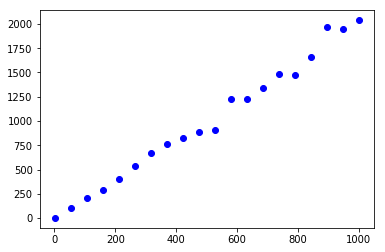

In [524]:
X,Y,Ye = power_data_gen()
plt.figure()
plt.plot(X,Y+Ye,'bo')

<IPython.core.display.Javascript object>


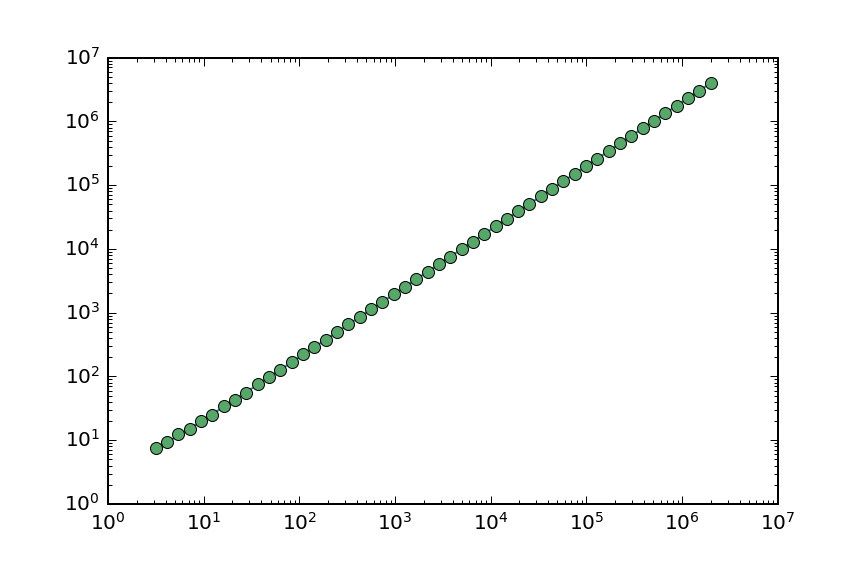

In [252]:
%matplotlib notebook
plt.style.use("seaborn-deep")
plt.figure()
X,Y = dg_lin.generate((0.5,6.3),50,
                      x_spacing='log')
Xn,Yn = dg_lin.generate((0.5,6.3),50,
                        x_spacing='log',
                        y_noise=ng_1a)
plt.plot(X,Y,'-',Xn,Yn,'o')
plt.xscale('log')
plt.yscale('log')

In [236]:
X, Y

(array([3.16227766e+00, 1.20226443e+01, 4.57088190e+01, 1.73780083e+02,
        6.60693448e+02, 2.51188643e+03, 9.54992586e+03, 3.63078055e+04,
        1.38038426e+05, 5.24807460e+05, 1.99526231e+06]),
 array([ 268086.48359444, -603012.44322365, -546535.65051162,
         934766.8223824 ,  572050.06776641,  209165.31486458,
          75308.78568045,  -82629.33993418,  231249.73036883,
         688220.44882167, 3640489.67075286]))

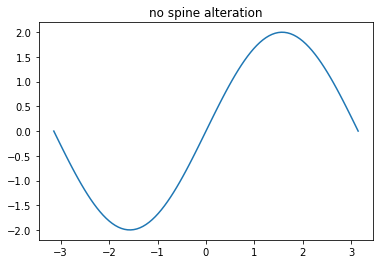

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
x = np.linspace(-np.pi, np.pi, 100)
y = 2*np.sin(x)

ax = fig.add_subplot(1,1,1)
ax.set_title('no spine alteration')
ax.plot(x, y)

In [12]:
ax

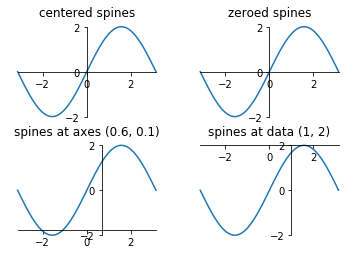

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
x = np.linspace(-np.pi, np.pi, 100)
y = 2*np.sin(x)

ax = fig.add_subplot(2, 2, 1)
ax.set_title('centered spines')
ax.plot(x, y)
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax = fig.add_subplot(2, 2, 2)
ax.set_title('zeroed spines')
ax.plot(x, y)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax = fig.add_subplot(2, 2, 3)
ax.set_title('spines at axes (0.6, 0.1)')
ax.plot(x, y)
ax.spines['left'].set_position(('axes', 0.6))
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position(('axes', 0.1))
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax = fig.add_subplot(2, 2, 4)
ax.set_title('spines at data (1, 2)')
ax.plot(x, y)
ax.spines['left'].set_position(('data', 1))
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position(('data', 2))
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

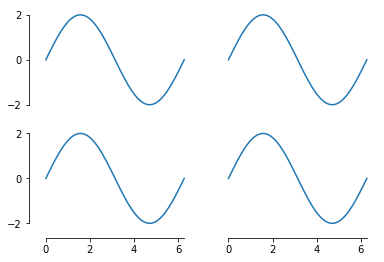

In [4]:
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points
            spine.set_smart_bounds(True)
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])

fig = plt.figure()

x = np.linspace(0, 2*np.pi, 100)
y = 2*np.sin(x)

ax = fig.add_subplot(2, 2, 1)
ax.plot(x, y, clip_on=False)
adjust_spines(ax, ['left'])

ax = fig.add_subplot(2, 2, 2)
ax.plot(x, y, clip_on=False)
adjust_spines(ax, [])

ax = fig.add_subplot(2, 2, 3)
ax.plot(x, y, clip_on=False)
adjust_spines(ax, ['left', 'bottom'])

ax = fig.add_subplot(2, 2, 4)
ax.plot(x, y, clip_on=False)
adjust_spines(ax, ['bottom'])

In [15]:
from matplotlib import font_manager
from glob import glob
font_list = glob('fonts/*')
font_list

['fonts/ARIAL.TTF',
 'fonts/ARIALBD.TTF',
 'fonts/ARIALBI.TTF',
 'fonts/ARIALI.TTF',
 'fonts/ARIALUNI.TTF',
 'fonts/CALIBRI.TTF',
 'fonts/CALIBRIB.TTF',
 'fonts/CALIBRII.TTF',
 'fonts/CALIBRIL.TTF',
 'fonts/CALIBRILI.TTF',
 'fonts/CALIBRIZ.TTF',
 'fonts/CAMBRIAB.TTF',
 'fonts/CAMBRIAI.TTF',
 'fonts/CAMBRIAZ.TTF',
 'fonts/CONSOLA.TTF',
 'fonts/CONSOLAB.TTF',
 'fonts/CONSOLAI.TTF',
 'fonts/CONSOLAZ.TTF',
 'fonts/COUR.TTF',
 'fonts/COURBD.TTF',
 'fonts/COURBI.TTF',
 'fonts/COURI.TTF',
 'fonts/DejaVuSans.ttf',
 'fonts/DejaVuSansMono-Bold.ttf',
 'fonts/DejaVuSansMono.ttf',
 'fonts/DejaVuSerif-Bold.ttf',
 'fonts/DejaVuSerif.ttf',
 'fonts/L_10646.TTF',
 'fonts/MathJax_Main-Bold.otf',
 'fonts/MathJax_Main-Italic.otf',
 'fonts/MathJax_Main-Regular.otf',
 'fonts/MathJax_SansSerif-Bold.otf',
 'fonts/MathJax_SansSerif-Italic.otf',
 'fonts/MathJax_SansSerif-Regular.otf',
 'fonts/MathJax_Typewriter-Regular.otf',
 'fonts/MICROSS.TTF',
 'fonts/PALA.TTF',
 'fonts/PALAB.TTF',
 'fonts/PALABI.TTF',
 'font

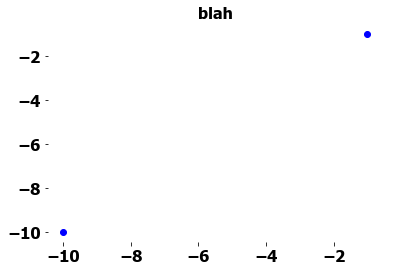

In [54]:
font = np.random.choice(np.array(font_list))
ticks_font = font_manager.FontProperties(fname = font, style='normal', size=16, weight='bold', stretch='normal')

fig1 = plt.figure()
series1 = plt.plot([-10,-1],[-10,-1],'ob')
ax=plt.gca()

for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)

for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
    
plt.title(font)
ax.set_title('blah', fontproperties=ticks_font)
# ax.get_children()[1]._visible=False
plt.box(False)
#     save_name = os.path.join('negatives_test',os.path.basename(font)[:-4]+'.png')
#     plt.savefig(save_name)
#     plt.close()

In [59]:
series1.

{'_agg_filter': None,
 '_alpha': None,
 '_animated': False,
 '_antialiased': True,
 '_axes': <matplotlib.axes._subplots.AxesSubplot at 0x122230080>,
 '_clipon': True,
 '_clippath': None,
 '_color': 'b',
 '_contains': None,
 '_dashOffset': None,
 '_dashSeq': None,
 '_dashcapstyle': 'butt',
 '_dashjoinstyle': 'round',
 '_drawstyle': 'default',
 '_gid': None,
 '_in_layout': True,
 '_invalidx': False,
 '_invalidy': False,
 '_label': '_line0',
 '_linestyle': 'None',
 '_linestyles': None,
 '_linewidth': 1.5,
 '_marker': <matplotlib.markers.MarkerStyle at 0x12232d208>,
 '_markeredgecolor': 'auto',
 '_markeredgewidth': 1.0,
 '_markerfacecolor': 'auto',
 '_markerfacecoloralt': 'none',
 '_markersize': 6.0,
 '_markevery': None,
 '_mouseover': False,
 '_oid': 0,
 '_path': Path(array([[-10., -10.],
        [ -1.,  -1.]]), None),
 '_path_effects': [],
 '_picker': None,
 '_propobservers': {},
 '_rasterized': None,
 '_remove_method': <function list.remove>,
 '_sketch': None,
 '_snap': None,
 '_solidca

In [33]:
ax.xaxis

In [37]:
spine = ax.get_children()[1]

In [38]:
spine

In [40]:
spine._visible=False

In [41]:
ax

In [44]:
plt.show()